**Autor:** Dávid Dráb  <br> *[Prírodovedecká fakulta](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), Univerzita Pavla Jozefa Šafárika, Košice 2023* <br> email: [david.drab163@gmail.com](mailto:david.drab163@gmail.com).
***
**<font size=6.5 color=darkblue> Analýza hlavných komponentov pre funkconálne dáta I </font>**  

--- 
<a id=obsah></a>

**<font size=5.5 color=darkblue> Obsah </font>** <br>
1. [Od PCA ku FPCA](#prechod) 


2. [FPCA pre úplné dáta](#uplne)


3. [FPCA pre neúplné dáta](#neuplne)


4. [Dvojrozmerná FPCA](#dvoj)


5. [Záver - súhrn](#zaver)


6. [Zdroje](#References)

--- 
<a id=prechod></a>

**<font size=5 color=darkblue> 1. Od PCA ku FPCA </font>** <br>

**<font size=4 color=darkblue> 1.1 PCA pre viacrozmerné dáta </font>** <br>

Z matematického hľadiska je analýza hlavných komponentov (z ang. *principal component analysis* - PCA) hľadanie takých vektorov $f_i$, pre ktoré platí:
$$ f_i =\sum_{j=1}^{p} \beta_{j}x_{ij}, i= 1, ..., N,$$
kde $\beta_j$ je váha pozorovanej hodnoty $x_{i,j}$ $j$-tej premennej.
Tiež môžeme túto lineárnu kombináciu vyjadriť ako $$ f_i=\beta'x_i, i = 1, ..., N,$$
kde $\beta$ je vektor $(\beta_1, ..., \beta_p)'$ a $x_i$ je vektor $(x_{i1}, ..., x_{ip})'$.

Vo viacrozmernej verzii volíme váhy tak, aby sme zvýraznili, resp. zobrazili tie typy roztylov, ktoré sú veľmi silne zastúpené v dátach. PCA môže byť definovaná takým postupom, ktorý definuje množiny normalizovaných váh, ktoré maximalizujú rozptyl $f_i$:
1. nájdeme váhový vektor $\xi_1 = (\xi_{11}, ..., \xi_{p1})'$ pre každú lineárnu kombináciu hodnôt $$f_{i1} =\sum_{j} \xi_{j1}x_{ij} = \xi_{1}'x_{i},$$
ktorá má najväčší možný priemerný štvorec $N^{-1}\sum_{i} f_{i1}^{2}$ s vlastnosťou $$\sum_{j} \xi_{j1}^2 = \lVert \xi_1 \rVert^2 =1. $$

2. V druhom kroku a v nasledujúcich $m$-tých krokoch (až po limitu počtu premennej p), vypočítame nový váhový vektor $\xi_m$ so zložkami $\xi_{jm}$ a s novou hodnotou $f_{im} = \xi_{m}'x_i$. Hodnoty $f_{im}$ majú maximálny priemerný štvorec v závislosti od $\lVert \xi_m \rVert^2 = 1$ a zároveň $$ \sum_j \xi_{jk}\xi_{jm} = \xi_{k}'\xi_{m} = 0 , k < m.$$ 

Prvý krok hovorí o tom, že **maximalizáciou priemerného súčtu štvorcov** identifikujeme najsilnejší a najdôležitejší rozptyl v premenných. **Jednotkový súčet štvorcov váh** je nevyhnutný, aby bol problém dobre definovaný. V druhom kroku tiež hľadáme ďalšie významné smery variancie v premenných, ale s takou podmienkou, aby váhy, ktoré ich definujú, boli **ortogonálne** k tým, ktoré boli určené v predchádzajúcom kroku.

Táto definícia neudáva váhy jednoznačne. Hodnoty lineárnej kombinácie $f_{m}$ nazývame **skóre hlavného komponentu** a často pomáhajú pri identifikovaní jednotlivých komponentov resp. pri ich interpretácií. 

**<font size=4 color=darkblue> 1.2 PCA pre funkcionálne dáta </font>** <br>

Vo funkcionálnom kontexte funguje PCA tak, že v premennej $x_{ij}$ je diskrétny index $j$ nahradený **spojitým indexom** $s$. V prípade, keď $\beta$ a dáta predstavovali vektory, tak lineárnu kombináciu týchto vektorov sme mohli vyjadriť pomocou skalárneho súčinu $$ \left\langle \beta, x \right\rangle = \sum_{j=1}^{p} \beta_{j}x_{j}.$$  

Keď $\beta$ a $x$ sú funkcie premennej $s$, tak sumácia cez $j$ je nahradená **integráciou** cez $s$ a teda skalárny súčin môžme vyjadriť ako $$\left\langle \beta, x \right\rangle = \int \beta(s) x(s) ds.$$

Váhy $\beta_j$ sa stanú **funkciami** $\beta_{j}(s)$ a skóre hlavného komponentu zodpovedajúceho váhe $\beta$ je teraz $$ 	f_i = \left\langle \beta, x_i \right\rangle = \int \beta(s)x_i(s)ds.$$

 V prvom kroku FPCA sa zvolí váhová funkcia $ \xi_1(s)$ taká, aby platilo, že $ N^{-1}\sum_i f_{i1}^2 = N^{-1} \sum_i(\int \xi_1x_i)^2$ a taktiež $\int \xi_1(s)^2ds = 1$. V druhom kroku potom podobne môžeme písať podmienku ortogonality ako $\int \xi_k\xi_m = 0, k<m.$

Viac detailov nájdeme u Ramsay a Silverman (2005).

--- 

<a id=uplne></a>
**<font size=5 color=darkblue> 2. FPCA pre úplné dáta </font>** <br>

**<font size=4 color=darkblue> 2.1 Popis skúmaných dát </font>** <br>

Našimi skúmanými dátami sú profily traktu frakčnej anizotropie (FA) pre corpus callosum (cca) DTI z balíka *refund* (Goldsmith J. a kol, 2022) v programe R. Dáta v tejto knižnici obsahujú výsledky merania metódou difúzne váženého zobrazovania pomocou magnetickej rezonancie, ktorá meria difúziu vody v tkanivách, ako je ľudský mozog.

In [24]:
# instalacia a inicializacia potrebnych balikov a kniznic
options(warnings=-1)
suppressMessages(library("fda", quietly = TRUE, verbose = FALSE))
suppressMessages(library("readr", quietly = TRUE, verbose = FALSE))
suppressMessages(library("refund", quietly = TRUE, verbose = FALSE))
suppressMessages(library("fields", quietly = TRUE, verbose = FALSE))
suppressMessages(library("mgcv", quietly = TRUE, verbose = FALSE))
data(DTI)
attach(DTI)

The following objects are masked from DTI (pos = 3):

    case, cca, ID, Nscans, pasat, rcst, sex, visit, visit.time




In [25]:
# vytvorime si pomocne premenne
DTI.complete <- subset(DTI, complete.cases(DTI))
DTI.baseline <- subset(DTI.complete, visit == 1 & case == 1)
meranie <- 1:93
n <- length(unique(DTI.baseline$ID))

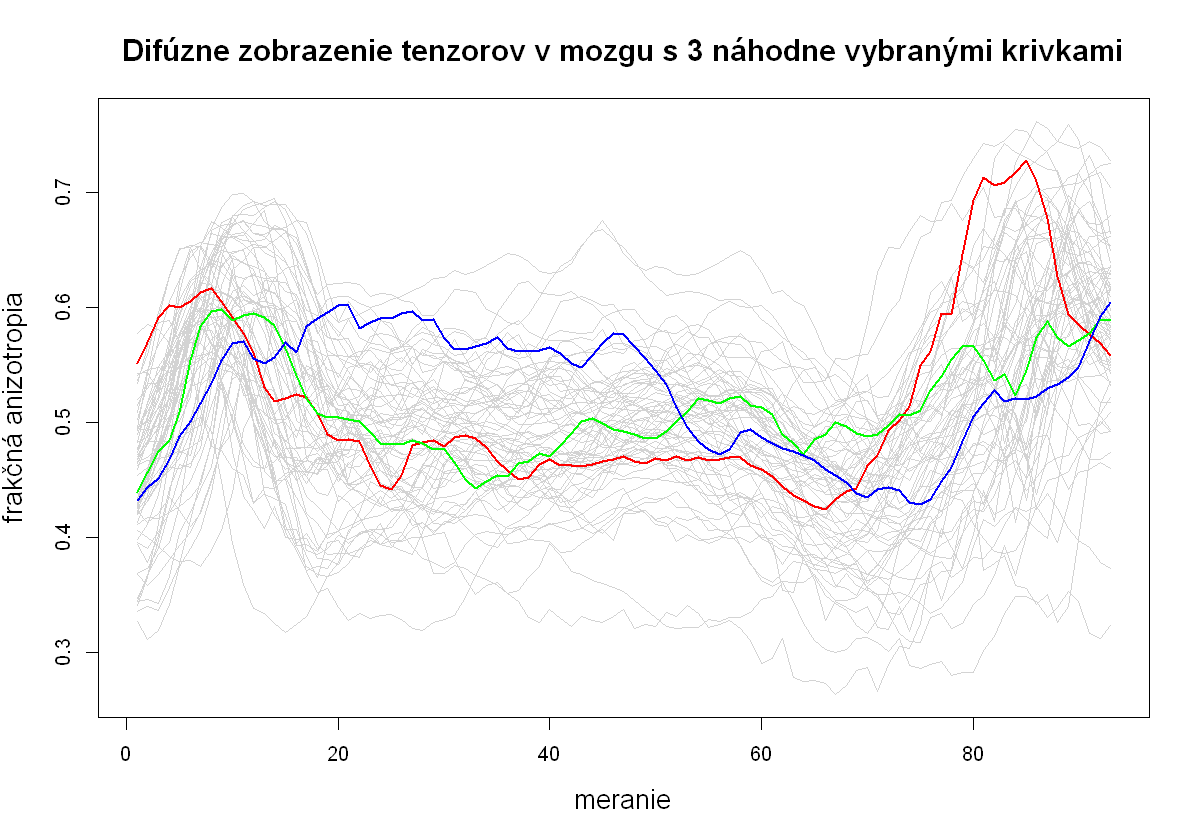

In [26]:
options(repr.plot.width=10, repr.plot.height=7)
matplot(meranie, t(DTI.baseline$cca), 
        type='l', lty=1, col="light grey",
        main = "Difúzne zobrazenie tenzorov v mozgu s 3 náhodne vybranými krivkami",
        xlab="meranie", ylab="frakčná anizotropia", cex.main=1.5, cex.lab=1.35)
sel.crv <- sample(1:n, size = 3, replace = FALSE)
matlines(meranie, t(DTI.baseline$cca[sel.crv,]), 
         type='l', lty=1, lwd=2, col = rainbow(3))

Na grafe môžeme vidieť celkom výrazný rozptyl dát. Tento rozptyl sa budeme snažiť vysvetliť pomocou funkcionálnej verzie metódy hlavných komponentov.

**<font size=4 color=darkblue> 2.2 Implementácia FPCA a interpretácia výsledkov </font>** <br>

Teraz si vyhladíme všetky naše krivky pomocou funkcie gam a následne si vykreslíme pôvodné a vyhladené vybrané krivky.

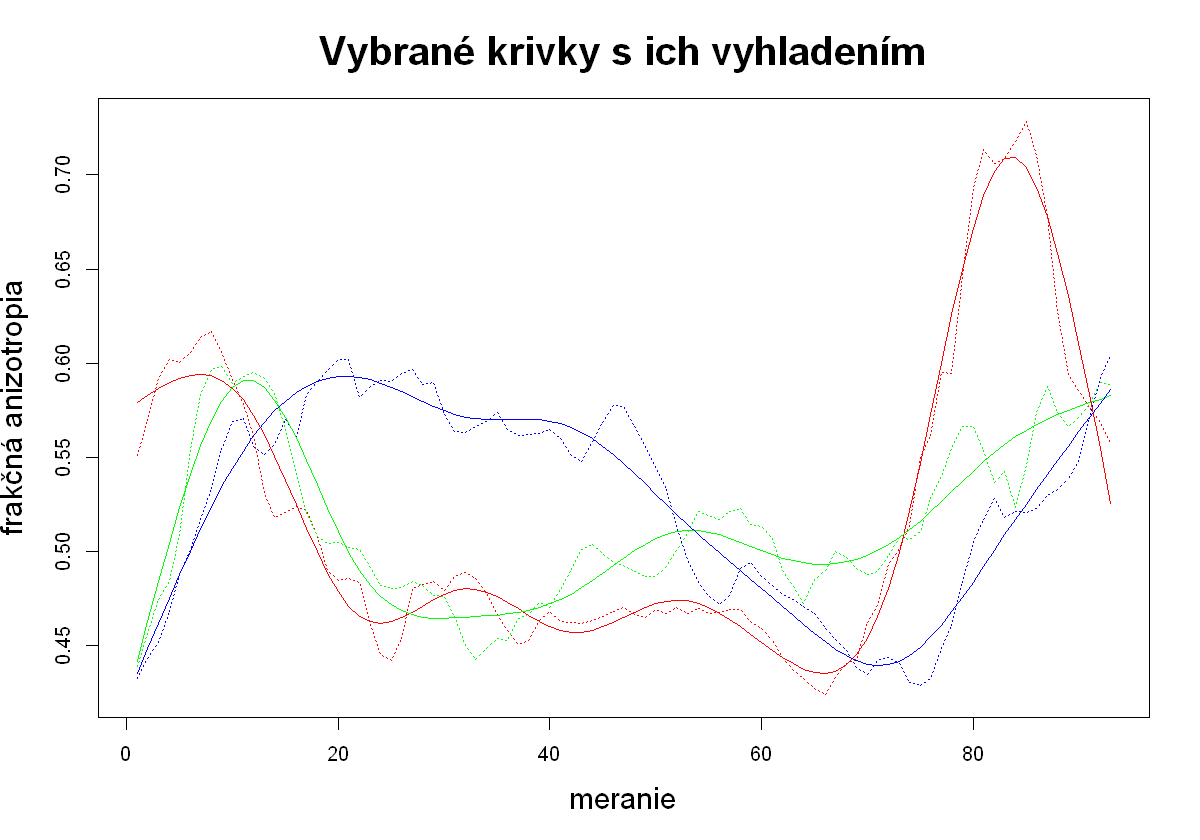

In [27]:
smooth.curves <- array(0, dim(DTI.baseline$cca))
n <- nrow(DTI.baseline$cca)
# vyhladime si krivky pomocou funkcie gam s desiatimi funkciami v baze
for(j in 1:n){
    fit <- gam(DTI.baseline$cca[j,] ~ s(meranie, k = 10, bs = 'cr'), method = "REML")
    smooth.curves[j,] <- fit$fitted
}
# vykreslime si par kriviek s vyhladenim
options(repr.plot.width=10, repr.plot.height=7)
matplot(meranie, t(DTI.baseline$cca[sel.crv,]), 
         type='l', lty=3, lwd=1, col = rainbow(3), main="Vybrané krivky s ich vyhladením", 
        cex.main=2, cex.lab=1.5, xlab="meranie",ylab="frakčná anizotropia")
matlines(meranie, t(smooth.curves[sel.crv,]), 
         type='l', lty=1, lwd=1, col = rainbow(3))

Pre FPCA je dôležitá:

* **funkcia priemeru** vyhladených kriviek; 


* **kovariančná matica** potrebná na spektrálny rozklad. 

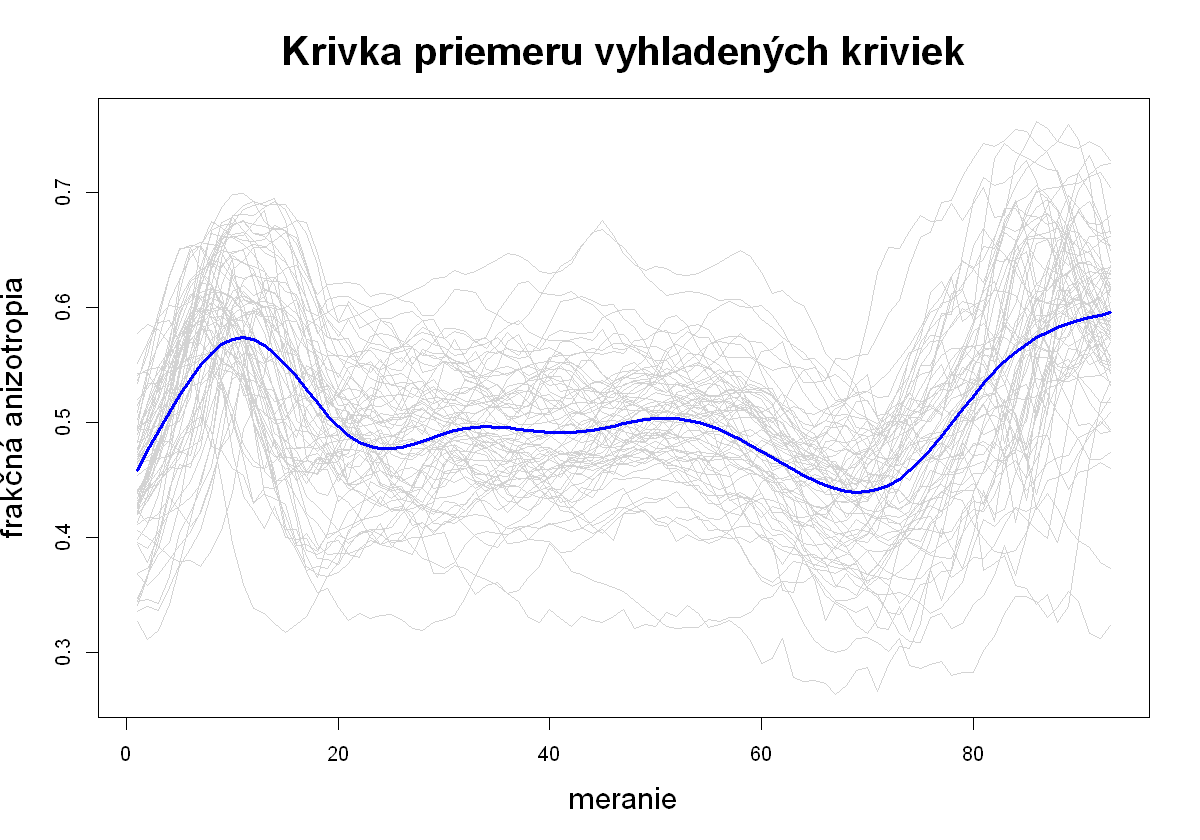

In [28]:
options(repr.plot.width=10, repr.plot.height=7)
mean.hat <- colMeans(smooth.curves)
matplot(meranie, t(DTI.baseline$cca), 
        type='l', lty=1, col="light grey",
        main="Krivka priemeru vyhladených kriviek", cex.main=2, cex.lab=1.55,xlab="meranie",
       ylab="frakčná anizotropia")
lines(meranie, mean.hat, col='blue', lwd=3)

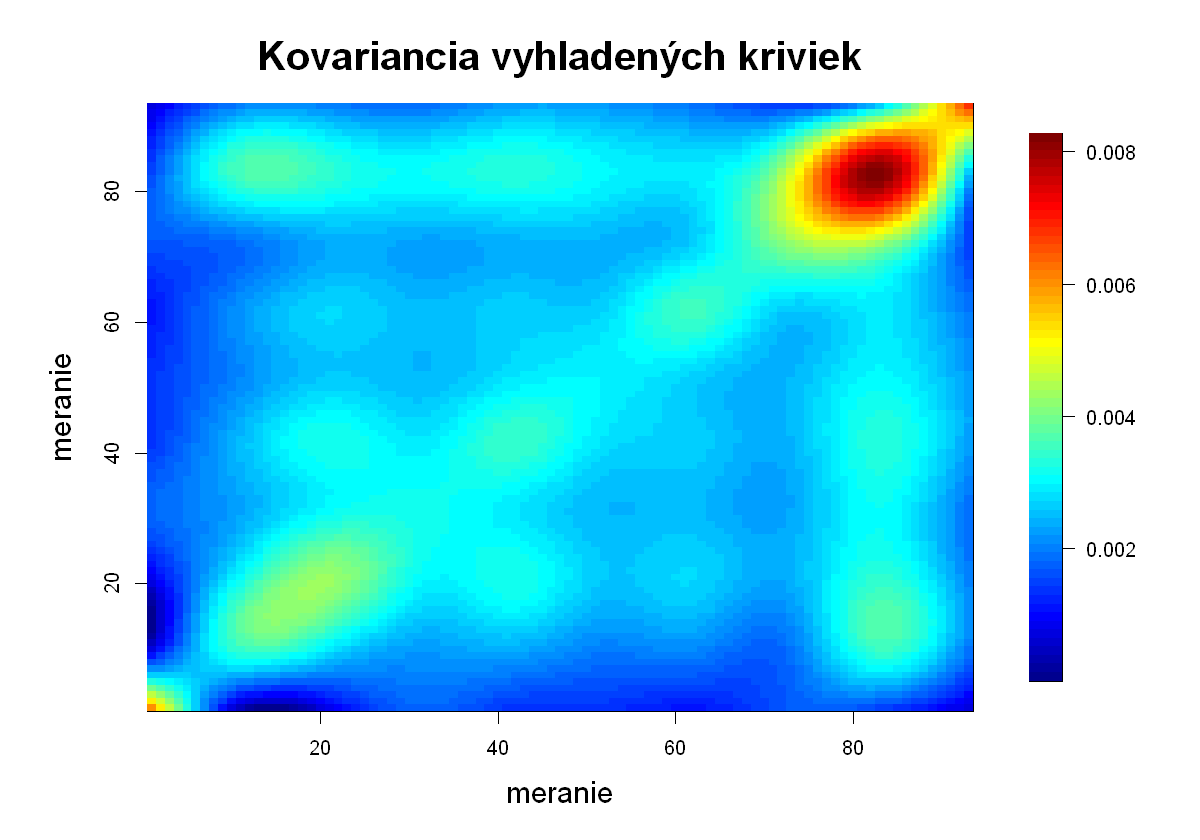

In [29]:
smooth.cov <- cov(smooth.curves)
image.plot(meranie, meranie, smooth.cov, 
           main='Kovariancia vyhladených kriviek', xlab="meranie", ylab="meranie", cex.main=2, cex.lab=1.5)

Pre hodnoty traktu 80 a viac môžeme vidieť kovarianciu slabo nad nulou v dátach. Inak je kovariancia takmer nulová.

Ďalej demonštrujeme postupný "ručný" výpočet vlastných funkcií a čísel. Je potrebné nezabudnúť ich aj správne škálovať. 

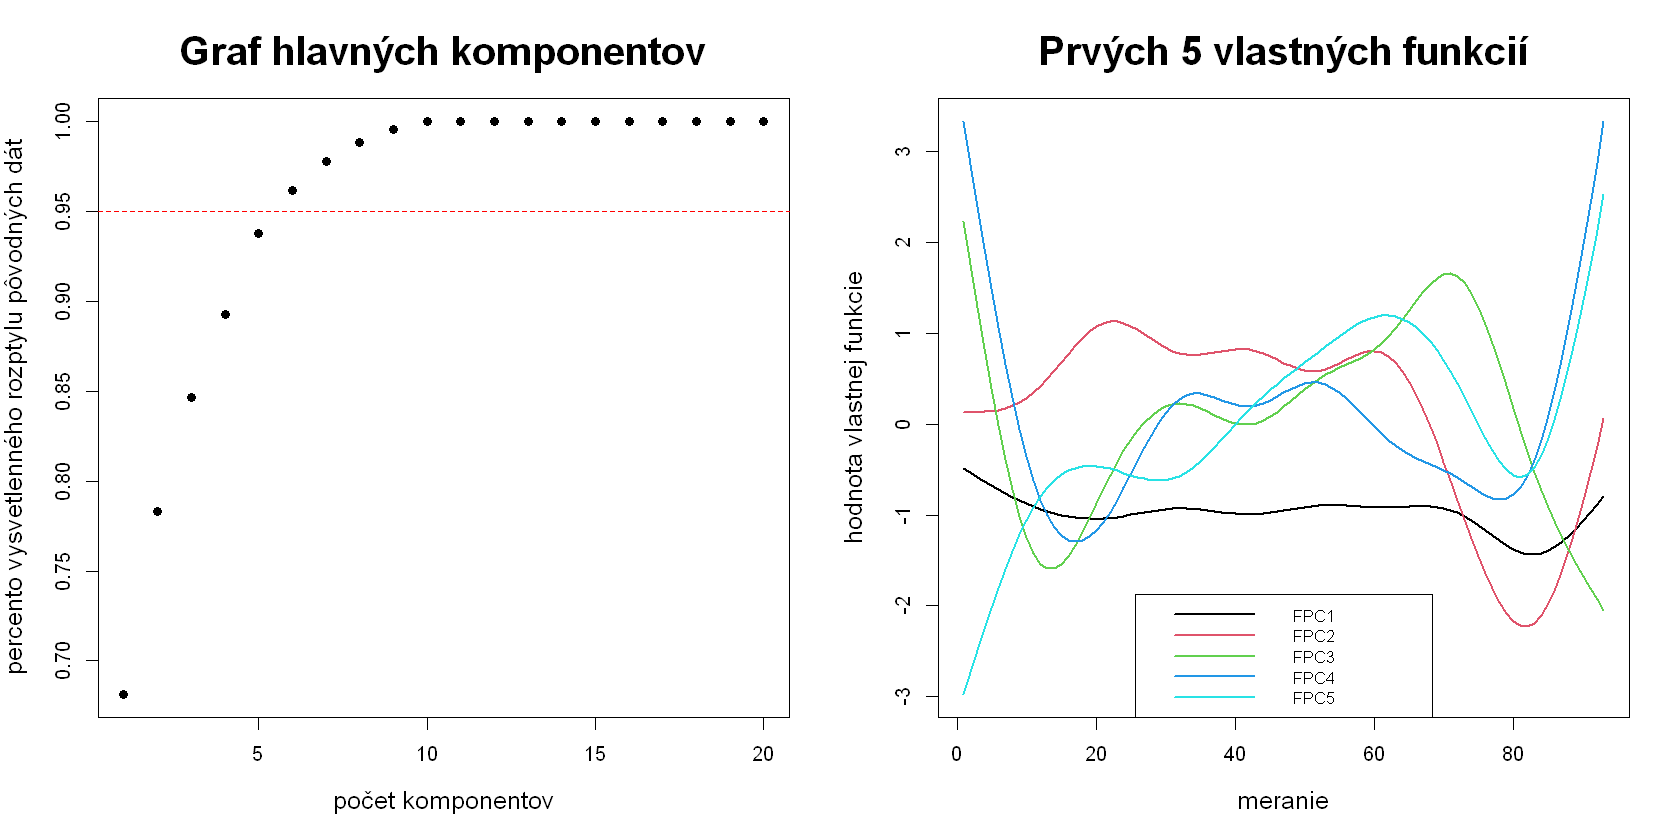

In [30]:
# spektralne si rozlozime symetricku kovariancnu maticu
svd.result0 <- eigen(smooth.cov, symmetric = TRUE)

evectors <- svd.result0$vectors[,svd.result0$values > 0]
evalues <- svd.result0$values[svd.result0$values > 0]

par(mfrow=c(1,2))

# skalujeme vlastne vektory a hodnoty
efns0 <- evectors*sqrt(93)
evals0 <- evalues/93
# ulozime si percento vysvetlenej kovariancie pre dany poceet komponentov
pve <- cumsum(evals0)/sum(evals0)
# ulozime si pocet potrebnych komponentov, ktore ma vysvetlit 95% variability 
npc <- sum(pve < 0.95) + 1

# ulozime si maximalne tolko vektorov a hodnot, kolko nam treba na vysvetlenie 95% variability
efns <- efns0[,1:npc]
evals <- evals0[1:npc]

options(repr.plot.width=14, repr.plot.height=7)
plot(1:20, pve[1:20], pch = 16, 
     ylab="percento vysvetlenného rozptylu pôvodných dát", xlab="počet komponentov",
     main="Graf hlavných komponentov", cex.main=2, cex.lab=1.25)
abline(h = 0.95, lty=2, col='red')

matplot(meranie, efns[,1:5], col=1:5, 
        type='l', lty=1, lwd=2,
        ylab="hodnota vlastnej funkcie", xlab="meranie",
        main="Prvých 5 vlastných funkcií",cex.main=2, cex.lab=1.25)
legend("bottom", lwd=2, lty=1, col=1:5, 
      legend = paste0("FPC", 1:5),cex=0.8)

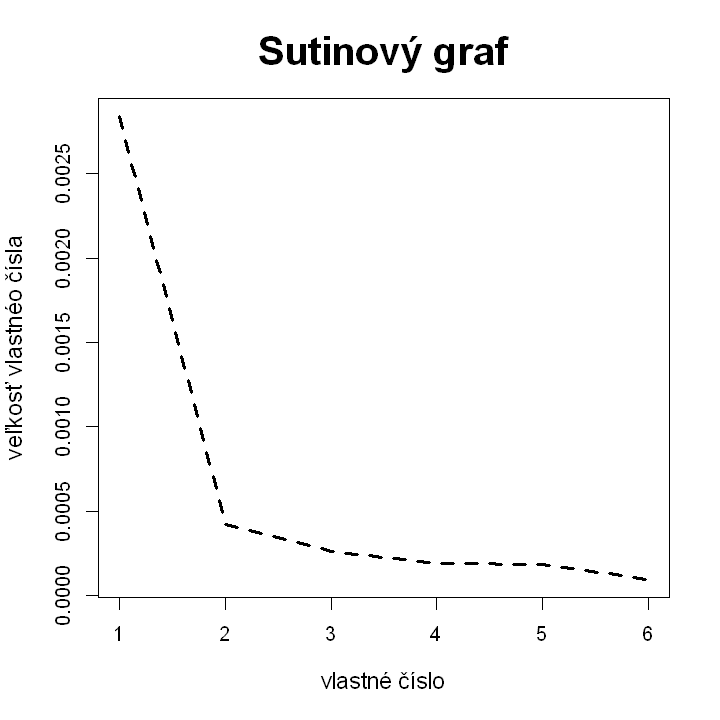

In [31]:
options(repr.plot.width=6, repr.plot.height=6)
plot(1:6, evals0[1:6], type="l",lty=2, lwd=3,
     ylab="veľkosť vlastnéo čísla", xlab="vlastné číslo",
     main="Sutinový graf", cex.main=2, cex.lab=1.15)

Sutinový graf nám v tomto prípade ukazuje zlom pre dve vlastné čísla, avšak dva komponenty vysvetlia ani 80% rozptylu pôvodných dát, čo pre FPCA je podľa literatúry málo. Preto nie je sutinový graf veľmi vhodným prostriedkom na určenie počtu hlavných komponentov.   

Podľa grafu sme určili, že približne 94% rozptylu pôvodných premenných vysvetlí až 5 komponentov. Vysvetlenie a určenie vlastných funkcií je na tejto metóde najťažšie. Avšak existujú i tzv. pomocné grafy ktoré nám pomáhajú určit resp. interpretovať, čo ktorá komponenta vysvetľuje.

Ešte predtým si ale zobrazíme vlastné funkcie pomocou vstavanej funkcie v softvéri R. Nasledujúci kód nám vypočíta a vykreslí aj vlastné funkcie, ktoré porovnáme s ručne vypočítanými funkciami.

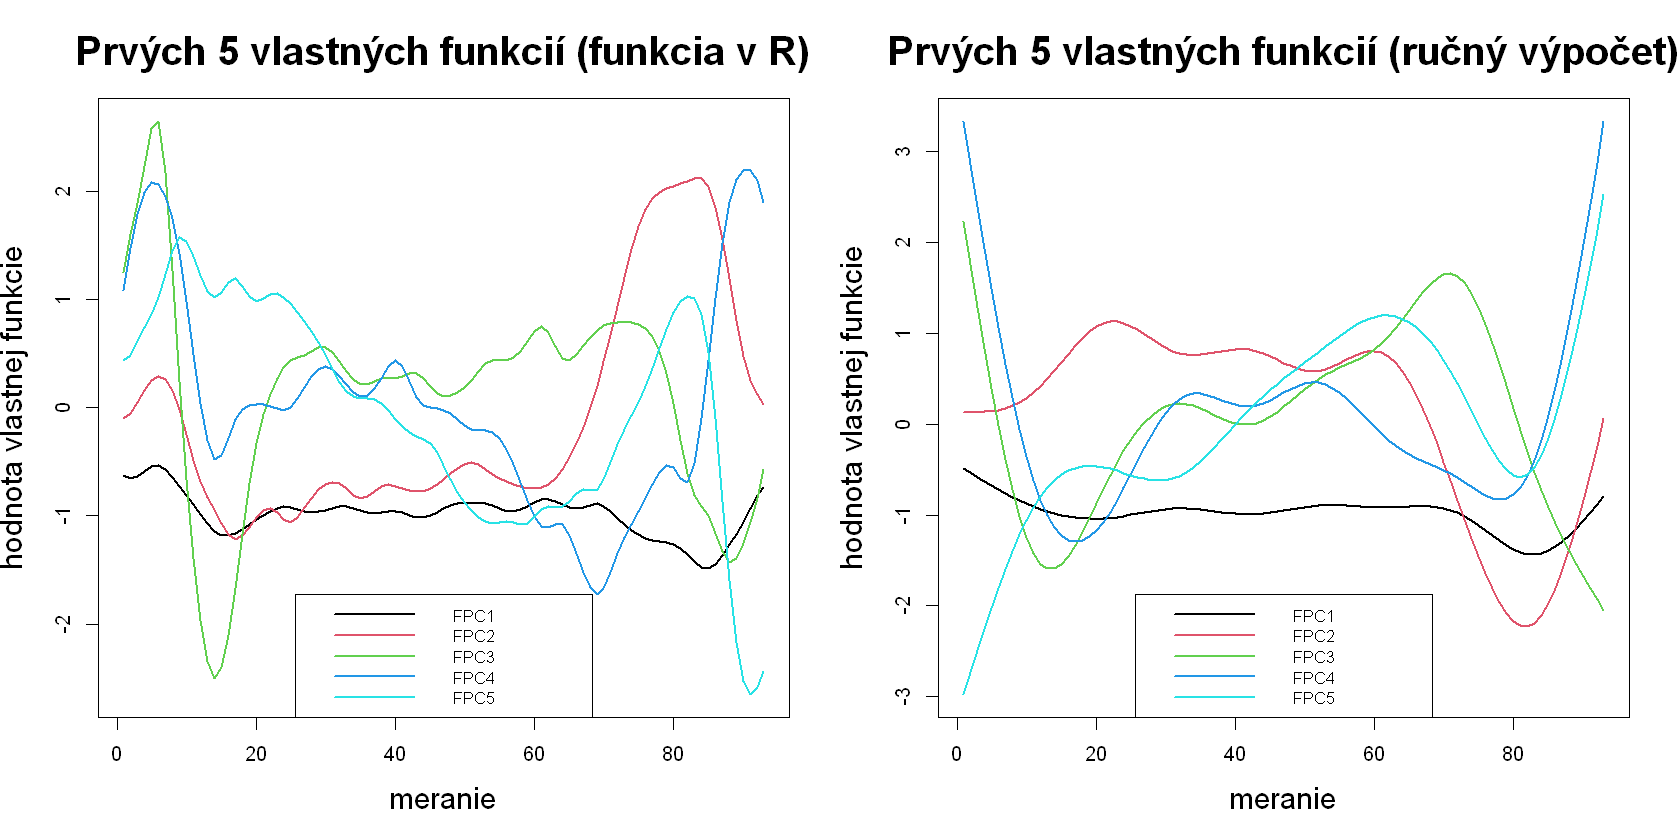

In [32]:
res.face <- fpca.face(Y = DTI.baseline$cca, argvals = meranie , pve = 0.95)

efn.face <- res.face$efunctions*sqrt(93)
eval.face <- res.face$evalues/93
options(repr.plot.width=14, repr.plot.height=7)
par(mfrow=c(1,2))

matplot(meranie, efn.face[,1:5], col=1:5, 
        type='l', lty=1, lwd=2,
        ylab="hodnota vlastnej funkcie", xlab="meranie",
        main="Prvých 5 vlastných funkcií (funkcia v R)", cex.main=2, cex.lab=1.5)
legend("bottom", lwd=2, lty=1, col=1:5, 
      legend = paste0("FPC", 1:5),cex=0.8)

matplot(meranie, efns[,1:5], col=1:5, 
        type='l', lty=1, lwd=2,
        ylab="hodnota vlastnej funkcie", xlab="meranie",
        main="Prvých 5 vlastných funkcií (ručný výpočet)", cex.main=2, cex.lab=1.5)
legend("bottom", lwd=2, lty=1, col=1:5, 
      legend = paste0("FPC", 1:5),cex=0.8)

Z grafov môžeme vidieť, že nami vyrátané vlastné funkcie (graf napravo) sú hladšie, ako vlastné funkcie vyrátané pomocou fukcie v R. Rozdiel spôsobuje rozdielny prístup k vyhladeniu pôvodných dát. Stačí, ak na začiatku pri ručnom rátaní uvedieme iný počet funkcií v báze pri vyhladzovaní kriviek. Taktiež niekoré vlastné funkcie majú prevrátené hodnoty, čo je tiež v poriadku.

Účinok každého komponentu môžeme vyzualizovať pomocou vzťahu 

$$\mu(t) \pm 2\sqrt{\lambda_k}\beta_k(t),$$

kde $\mu(t)$ je funkcia priemeru, $\lambda_k$ je $k$-te vlastné číslo a $\beta_k(t)$ je jej zodpovedajúci vlastný vektor (vzhľadom na diskreditáciu funkcie pracujeme reálne s vektorom, nie s funkciou).

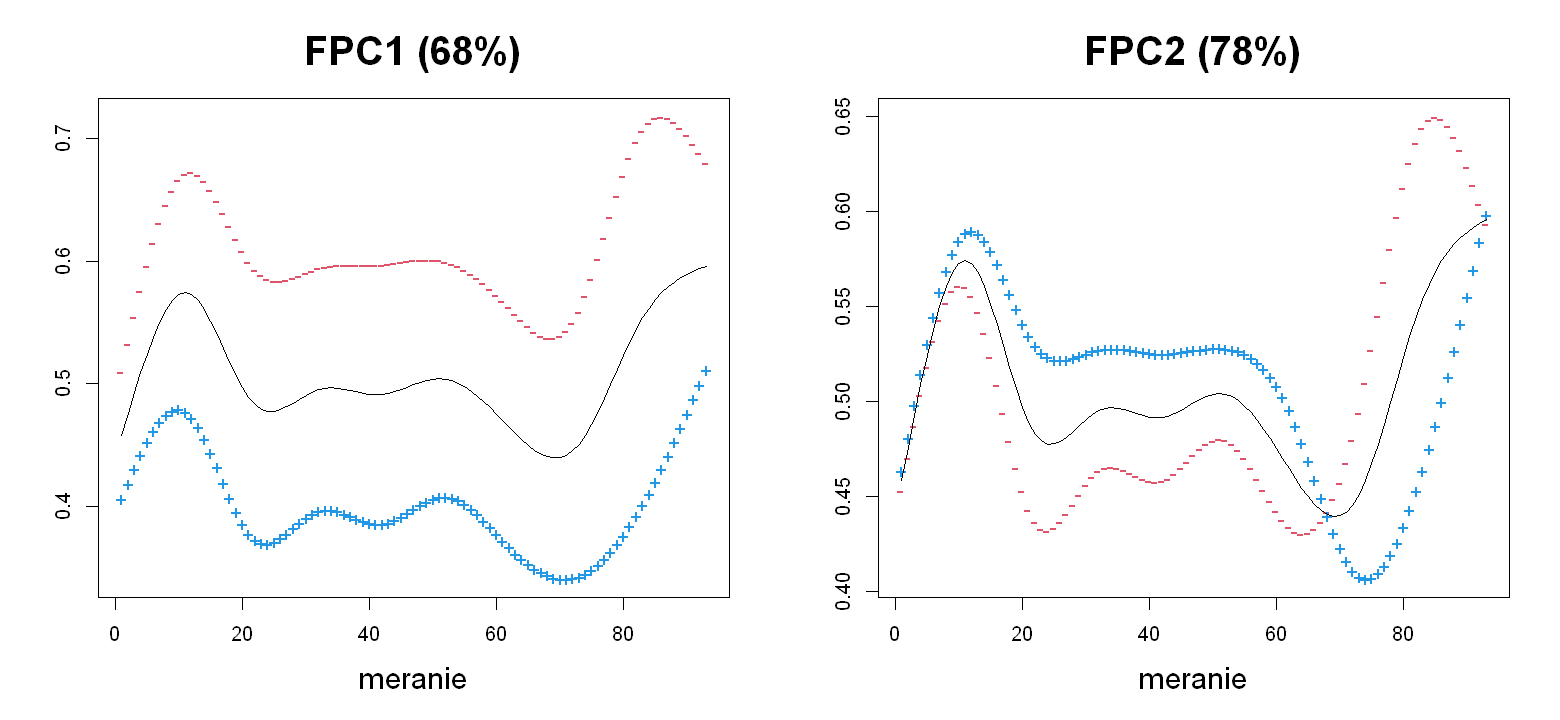

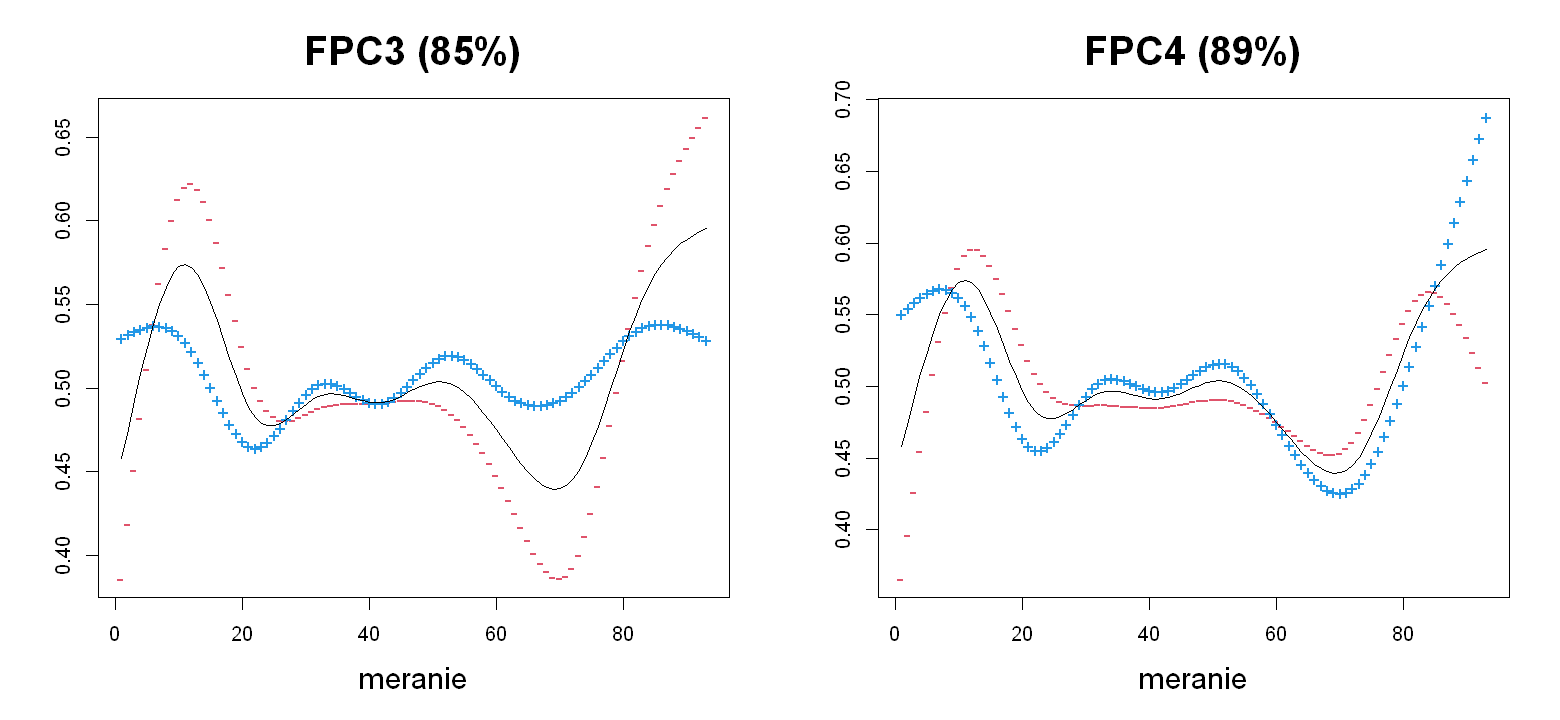

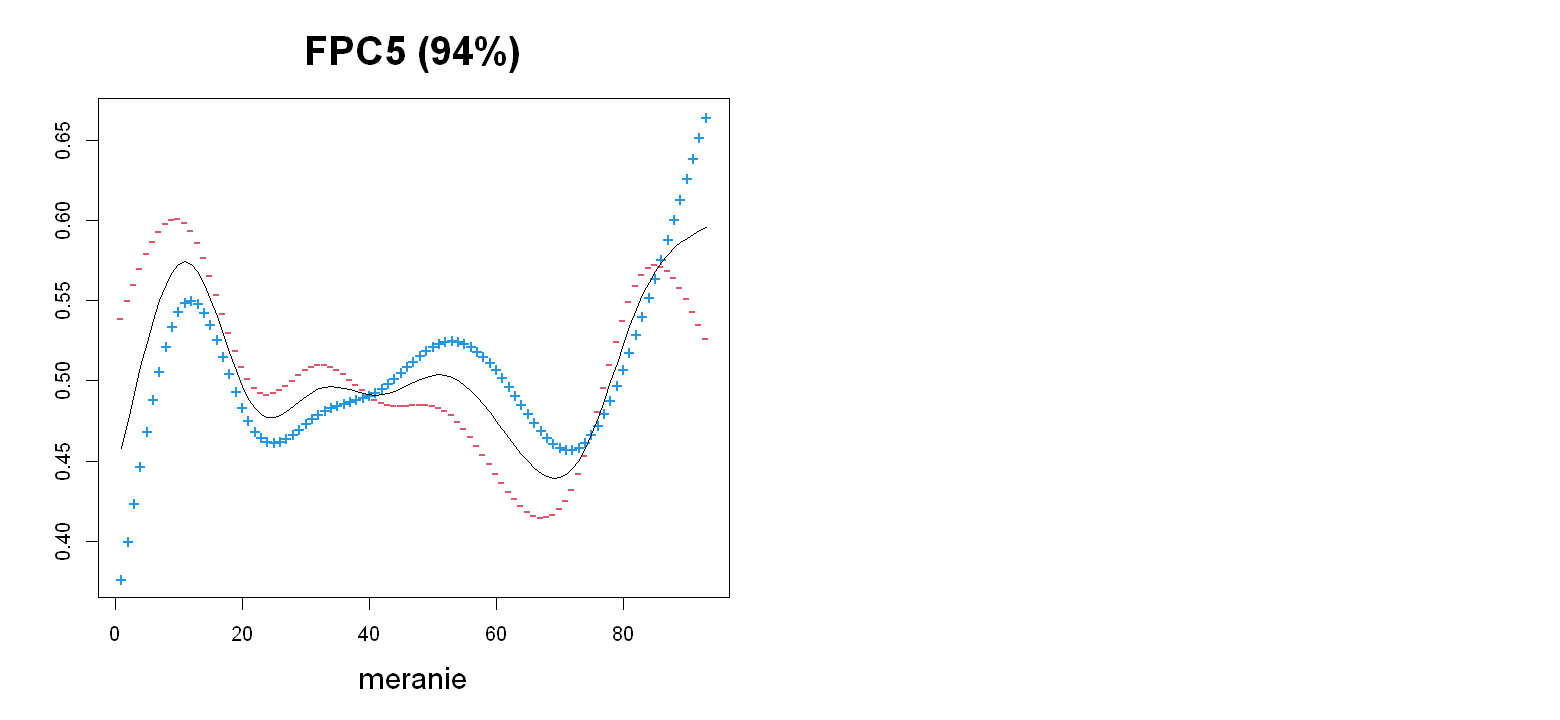

In [33]:
par(mfrow=c(1,2))
options(repr.plot.width=13, repr.plot.height=6)

for (i in 1:5){
k.pc <- i
effect <- efns[, k.pc]*2*sqrt(evals[k.pc])
mat <- cbind(mean.hat - effect,  mean.hat + effect)

matplot(meranie, mat, type='p', col=c(2,4), pch = c("-", "+"),
        ylab="", xlab="meranie", 
        main = paste0("FPC",k.pc, " (",round(pve[k.pc]*100),"%)"), cex.main=2, cex.lab=1.55)
lines(meranie, mean.hat, lty=1, lwd=1)
    }

* Prvý komponent ukazuje, že dáva do kontrastu ľudí, ktorí majú nízke a vysoké namerané hodnoty, teda ukazuje všeobecnú úroveň a zároveň vysvetlí 68% rozptylu pôvodných dát. 


* Druhý komponent dáva do kontrastu ľudí, ktorý majú medzi desiatym a sedemdesiatym meraním nadpriemerne namerané hodnoty a medzi sedemdesiatym a posledným meraním pod priemerné hodnoty a naopak, zároveň spolu s prvým komponentom vysvetlí až 78% rozptylu pôvodných dát. 


* Tretí komponent dáva do kontrastu ľudí, ktorí majú počatočné aj koncové hodnoty podhodnotené a zvyšné hodnoty mierne nadhodnotené vzhľadom na priemer a naopak, zároveň kumulatívne vysvetlí až 85% rozptylu.


* Zvyšné koponenty sa už ťažšie interpretujú aj vzhľadom na povahu dát. Avšak interpretácia je viacmenej podobná. Päť komponentov vysvetlí spolu až 95% rozptylu pôvodných premenných.


Treba podotknúť, že interpretácia výsledkov dát tohto (medicínskeho) typu je pre laikov pomerne náročná, ale v konečnom dôsledku to ani nebolo našim cieľom. Cieľom však bolo ukázať, že metóda FPCA je aplikovateľná aj pre nematematický typ dát, ktorý nám ukáže rozumné výsledky, hoci im nemusíme do hĺbky rozumieť. 

Medzi ďalšie grafy, ktoré nám pomáhajú interpretovať výsledky sú grafy skóre komponentov. Tieto grafy ukazujú, ako sú pozorované jednotky (v našom prípade sledovaní ľudia) rozmiestnené vzhľadom na hodnoty skóre rôznych vysvetľujúcich komponentov.  

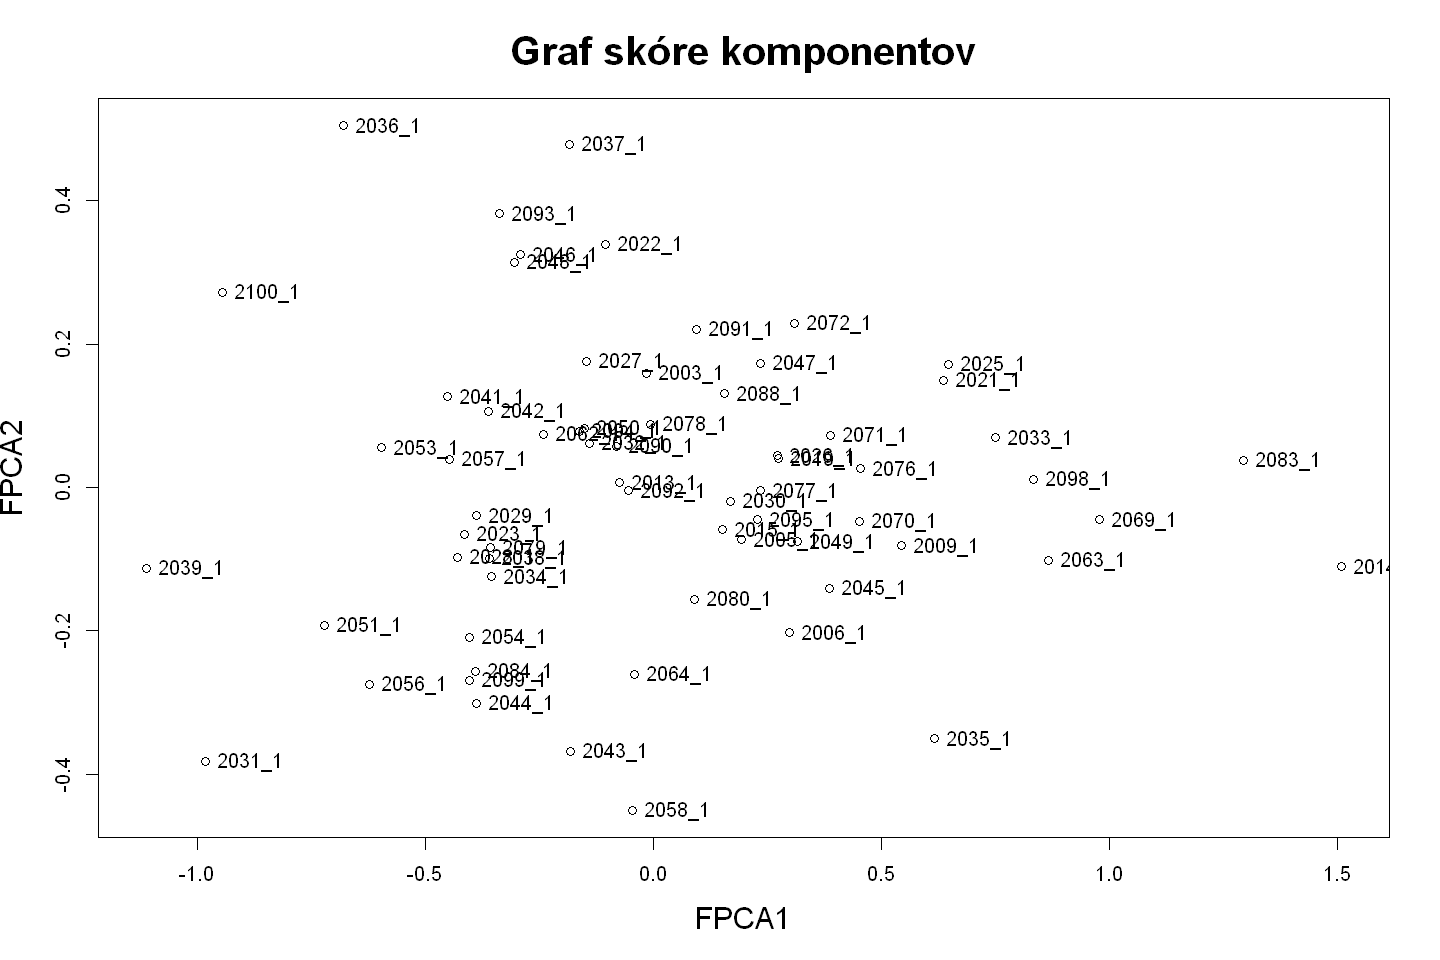

In [34]:
options(repr.plot.width=12, repr.plot.height=8)
plot(res.face$scores[,1],res.face$scores[,2], xlab="FPCA1", ylab="FPCA2", main="Graf skóre komponentov", 
     cex.main=2, cex.lab=1.5)
text(res.face$scores[,1],res.face$scores[,2],rownames(res.face$scores),pos=4)

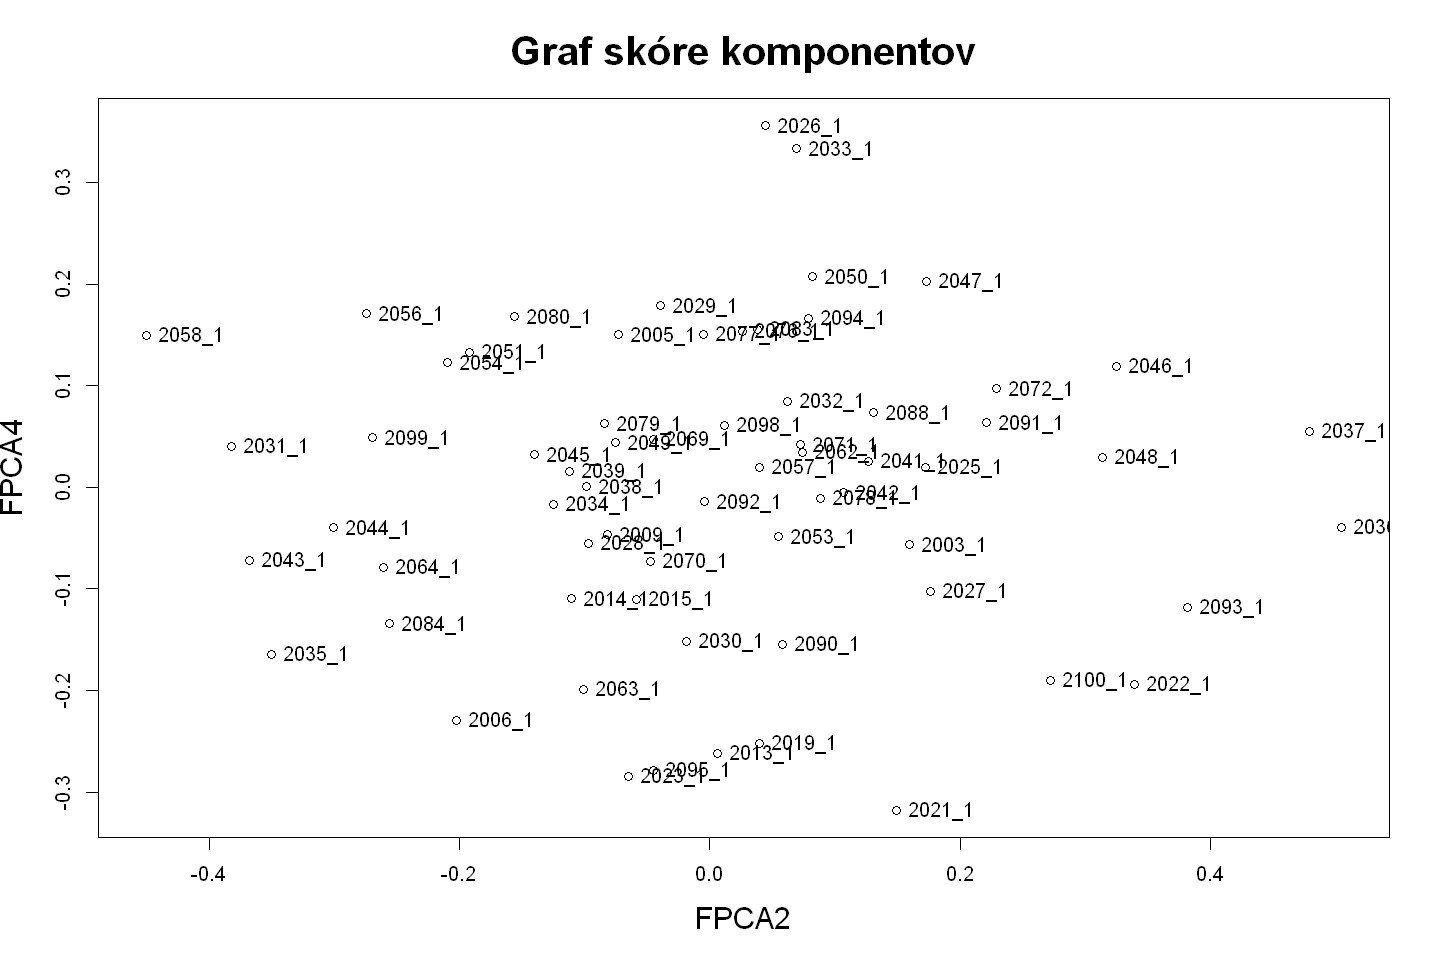

In [35]:
plot(res.face$scores[,2],res.face$scores[,4], xlab="FPCA2", ylab="FPCA4", main="Graf skóre komponentov", 
     cex.main=2, cex.lab=1.5)
text(res.face$scores[,2],res.face$scores[,4],rownames(res.face$scores),pos=4)

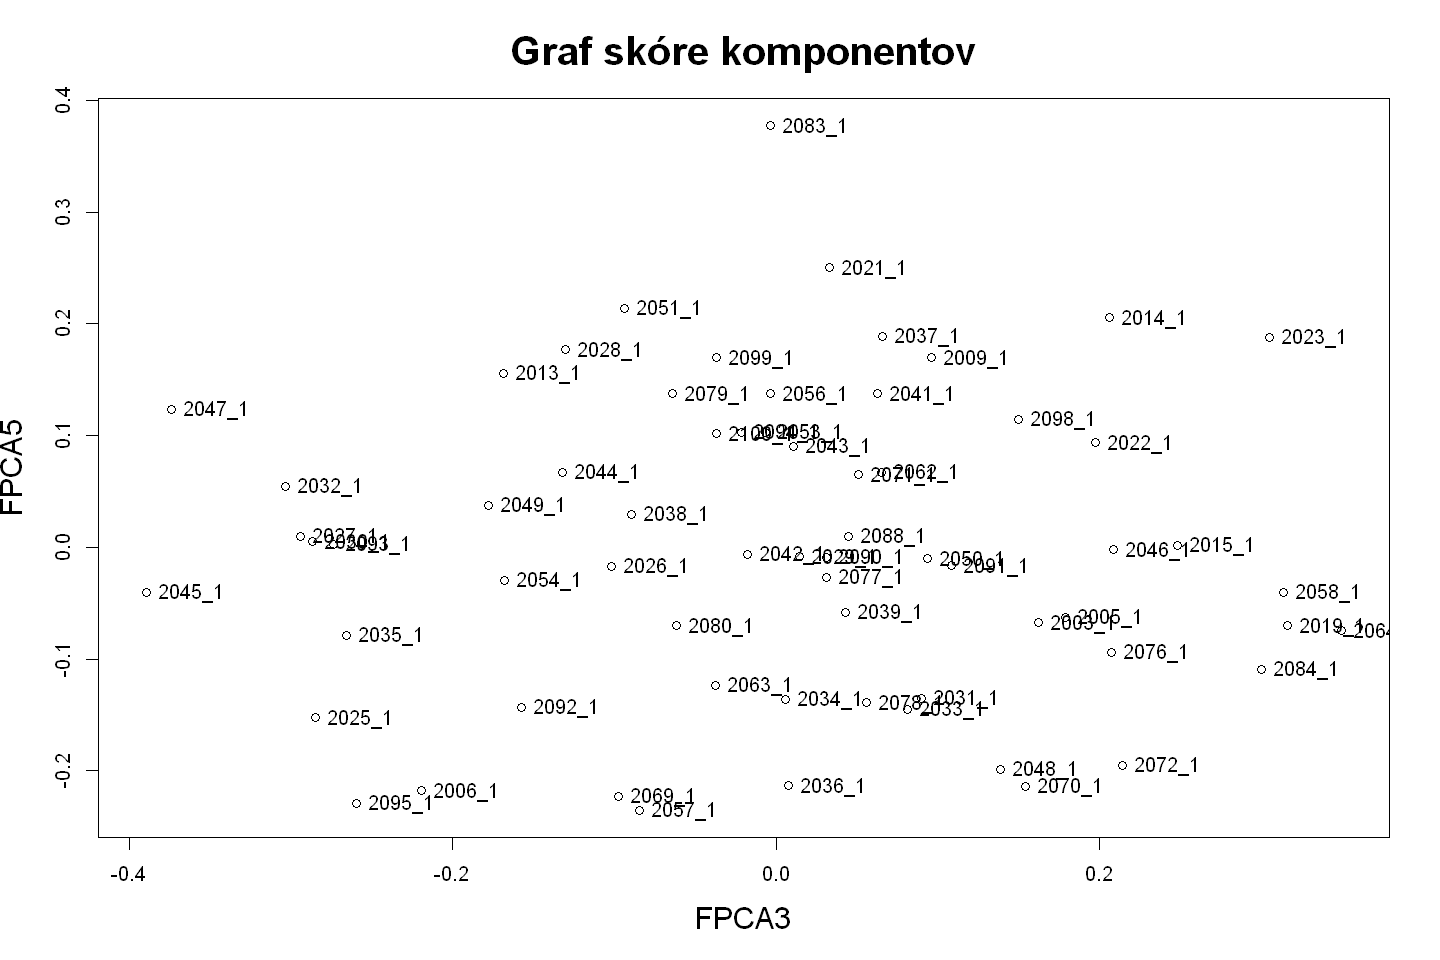

In [36]:
plot(res.face$scores[,3],res.face$scores[,5], xlab="FPCA3", ylab="FPCA5", main="Graf skóre komponentov", 
     cex.main=2, cex.lab=1.5)
text(res.face$scores[,3],res.face$scores[,5],rownames(res.face$scores),pos=4)

* Ak by sme si vykreslili krivky zodpovedajúde ID: 2014, 2083, 2031 a 2039 tak vidíme, že krivky s najvyšším skóre pre prvý komponent sú pomerne kontinuálne pod priemerom a tiež krivky s najnižším skóre pre prvý komponent sú pomerne kontinuálne nad priemerom. Čo zodpovedá všeobecnej úrovne. Tento záver nám potvrdzuje aj vyššie uvedený účinok prvej vlastnej funkcie na priemer.


* Ak by sme si vykreslili krivky zodpovedajúde ID: 2036, 2037, 2031 a 2058 tak vidíme, že krivky s najvyšším skóre pre druhý komponent sa až po meranie č. 70 nachádzajú pod krivkami s najnižším skóre pre druhý komponent. Tento fakt nám ukazuje aj graf účinku druhého komponentu. 


* Pre tretí komponent by nám vyšlo analogicky to isté, ako pre graf účinku pre tretí komponent. 

---

<a id=neuplne></a>
**<font size=5 color=darkblue> 3. FPCA pre neúplné dáta </font>** <br>

**<font size=4 color=darkblue> 3.1 Popis skúmaných dát </font>** <br>

V predchádzajúcej časti sme mali dáta, ktoré boli úplné v tom zmysle, že išlo o rovnako dlhé krivky s rovnakým počtom pozorovaní v každej krivke. Lenže takéto typu nie su všetky dáta. V knižnici *refund* (Goldsmith a kol., 2023) tiež nájdeme dataset *cd4* obsahujúci krivky, ktoré majú rozdielny interval pozorovaní, čo aj uvidíme na grafe. 
Samotné dáta nám reprezentujú koncentráciu CD4 buniek (inak aj T-lymfocyty) v krvi u 283 HIV pozitívnych mužov sledovanými medzi rokmi 1984 až 1991, ktorú sledujeme vzhľadom na [sérokonverziu](https://en.wikipedia.org/wiki/Seroconversion).  

Pri tejto implementácii sme sa inšpirovali online kurzom Staicu a Park (2016).

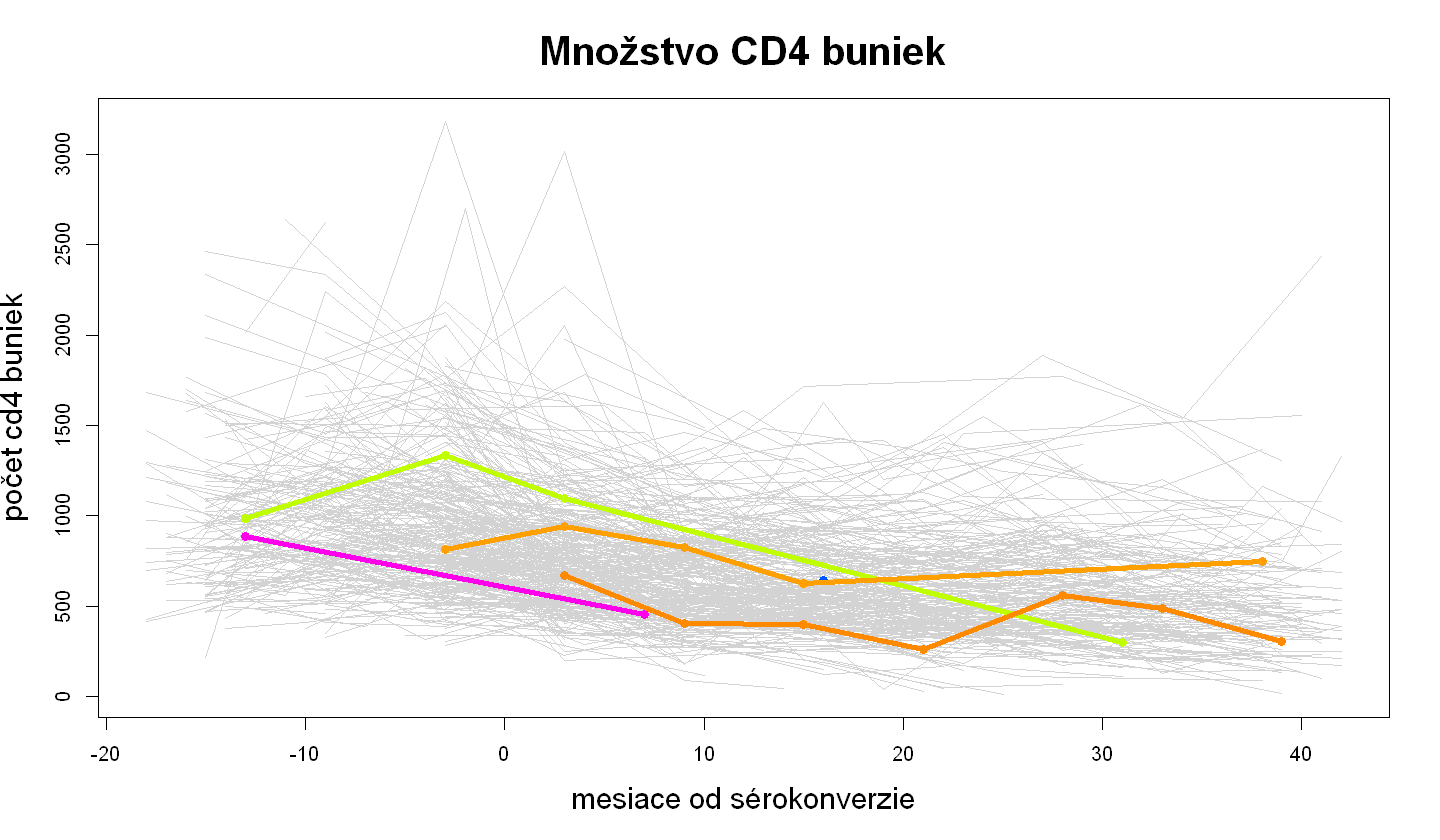

In [37]:
data(cd4)
n <- nrow(cd4)
month <- as.numeric(colnames(cd4)) 
m <- ncol(cd4)

# vykreslime si teraz nahodne vybrate krivky so zvysnimi krivkami v pozadi
options(repr.plot.width=12, repr.plot.height=7)

matplot(month, t(cd4), type='n', 
        main="Množstvo CD4 buniek", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie" , cex.main=2, cex.lab=1.5)
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
    lines(temp$x, temp$y, col="light grey")
}

set.seed(9425)
n.crv <- 5
sel.crv <- sample(1:n, size = n.crv, replace = FALSE)

for(i in 1:n.crv){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=rainbow(n)[sel.crv[i]], pch = 16, cex=1)
  lines(temp$x, temp$y, col=rainbow(n)[sel.crv[i]], lwd=4)
}

**<font size=4 color=darkblue> 3.2 Implementácia FPCA a interpretácia výsledkov </font>** <br>

Pre FPCA je podstatné určenie funkcie priemeru z vyhladených kriviek. Pre tento typ dát to bude trochu komplikovanejšie, ako môžeme vidieť v prvých riadkoch kódu. Vyhladíme dáta, ktoré následne použijeme do predikcie funkcie priemeru vyhladených kriviek. Ďalej už použijeme funkcie, ktoré nám program R ponúka na výpočty.


In [38]:
dat.vec <- data.frame(na.omit(cbind(rep(1:n, each = length(month)), 
                                        rep(month, n), as.vector(t(cd4)))))
colnames(dat.vec) <- c("id", "t","y")
# kvoli krivke priemeru, si vyhladime povodne krivky, ktore potom pouzijeme do predikcie krivky priemeru
fit <- gam(y ~ s(t, k = 10, bs = "cr"), method="REML", data = dat.vec)
mean.hat <- predict(fit, newdata = data.frame("t" = month))

Taktiež si vykreslíme niekoľko (prvých) vlastných funkcií. Ich interpretácia je obtiažna (ako platí vo všeobecnosti). Prvá môže popisovať funkciu priemeru. Druhá vlastná funkcia môže popisovať rozptýlenosť od krivky priemeru.

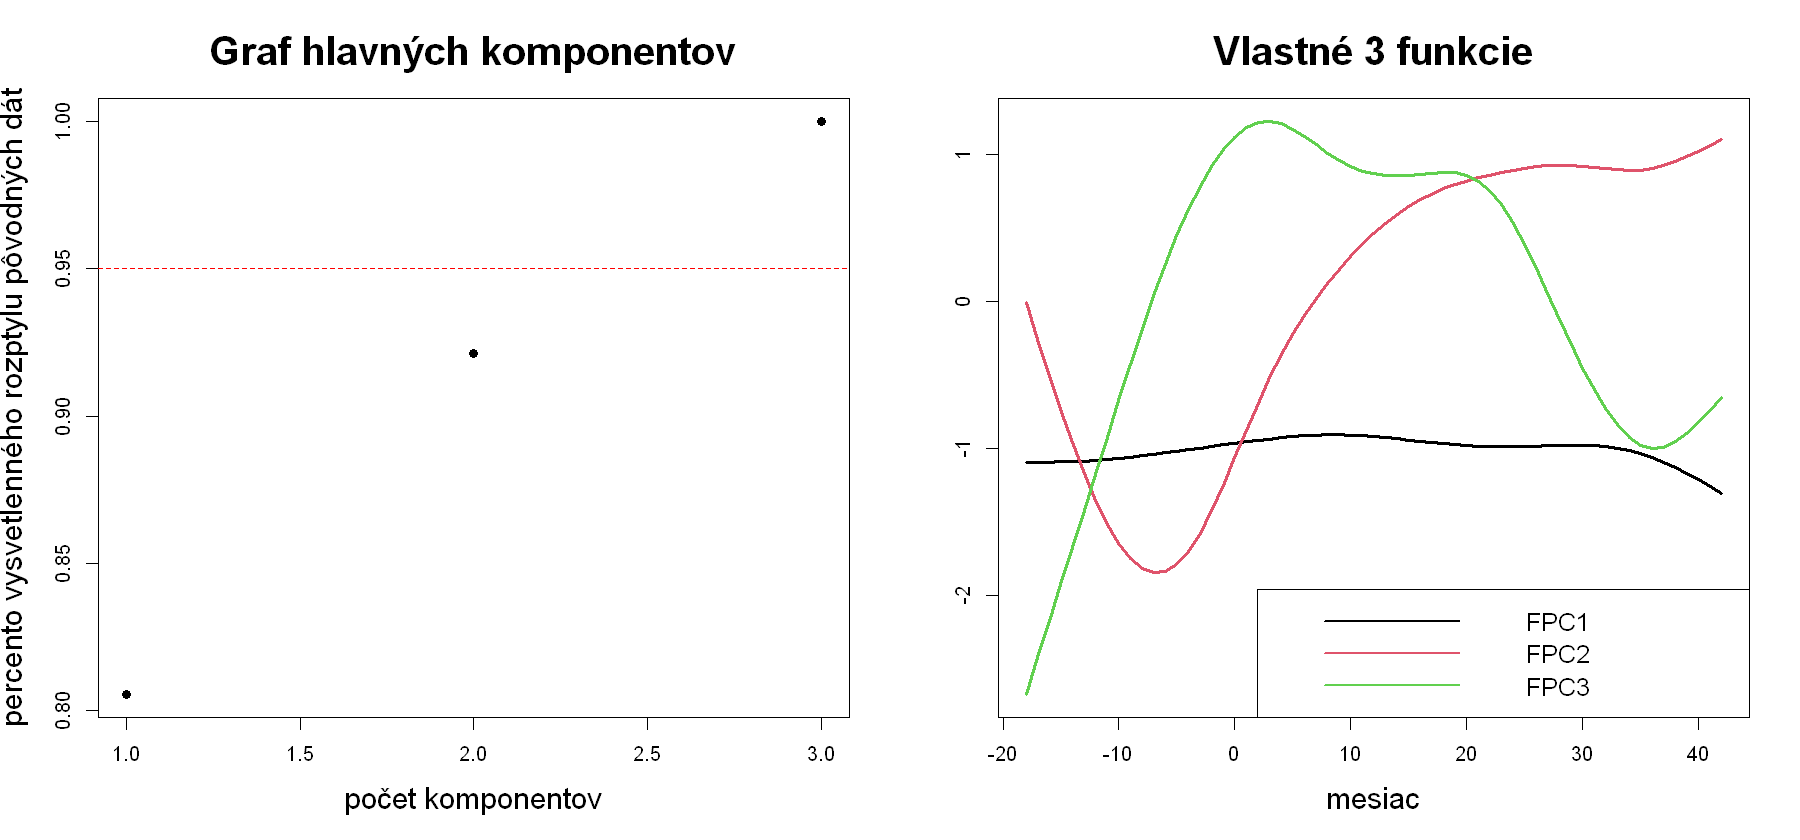

In [39]:
fpca.res <- fpca.sc(cd4, argvals = month, pve = 0.95, var = TRUE)
m <- length(month)
# skalovanie vektorov a hodnot 
efns <- fpca.res$efunctions*sqrt(m)
evals <- fpca.res$evalues/m
pve <- cumsum(evals)/sum(evals)
pve0 <- evals/sum(evals)


options(repr.plot.width=15, repr.plot.height=7)
par(mfrow=c(1,2))
plot(1:3, pve[1:3], pch = 16, 
     ylab="percento vysvetlenného rozptylu pôvodných dát", xlab="počet komponentov",
     main="Graf hlavných komponentov", cex.main=2, cex.lab=1.5)
abline(h = 0.95, lty=2, col='red')
matplot(month, efns, type='l', lwd=3, lty=1, 
        ylab="", xlab="mesiac", main=paste0("Vlastné ",fpca.res$npc, " funkcie"), cex.main=2, cex.lab=1.5)
legend("bottomright", lwd=2, lty=1, col=1:fpca.res$npc, 
      legend = paste0("FPC", 1:fpca.res$npc), cex=1.25)

Na ilustráciu môžeme vykresliť aj grafy účinku jednotlivých vlastných funkcií na krivku priemeru.

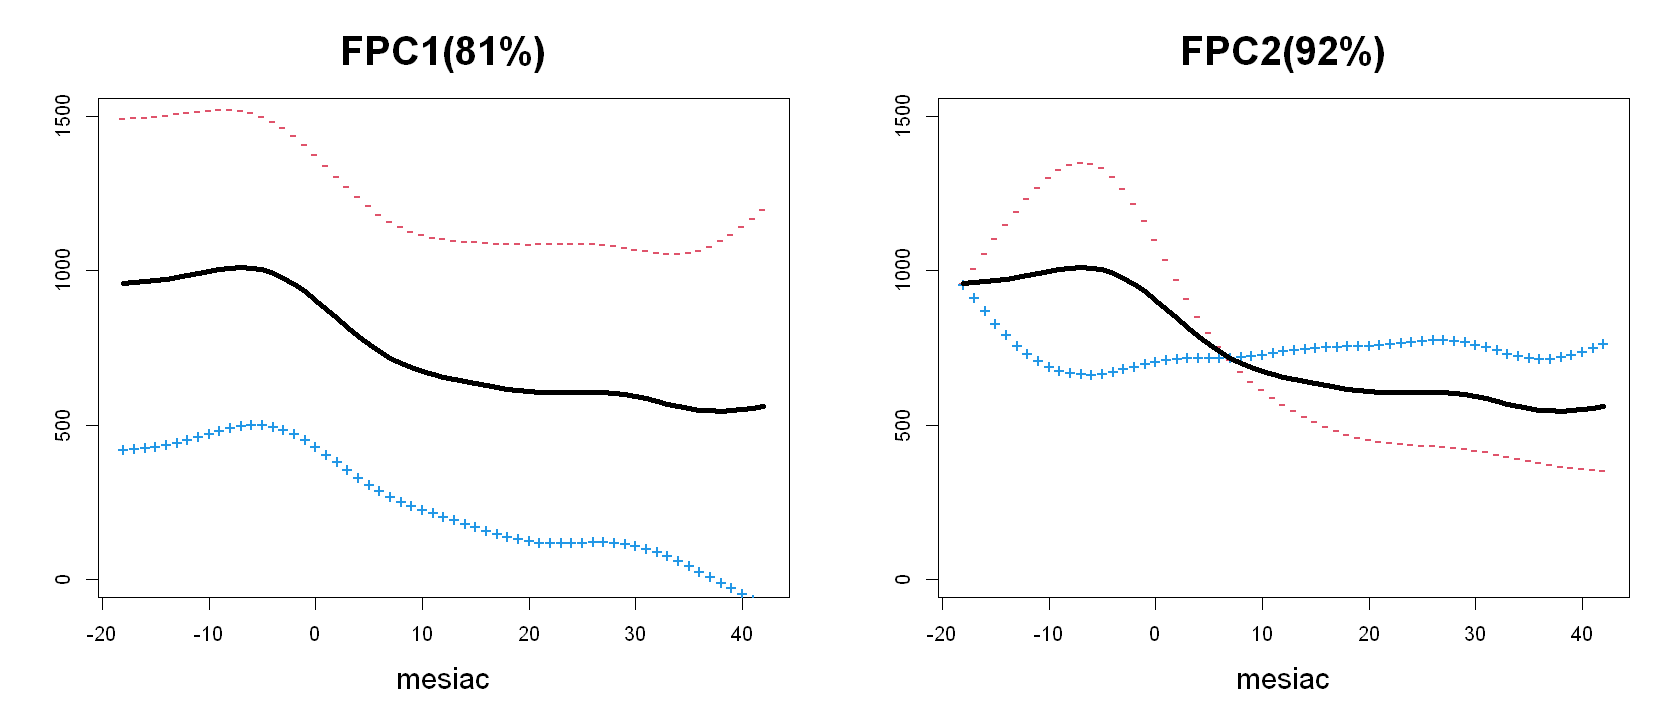

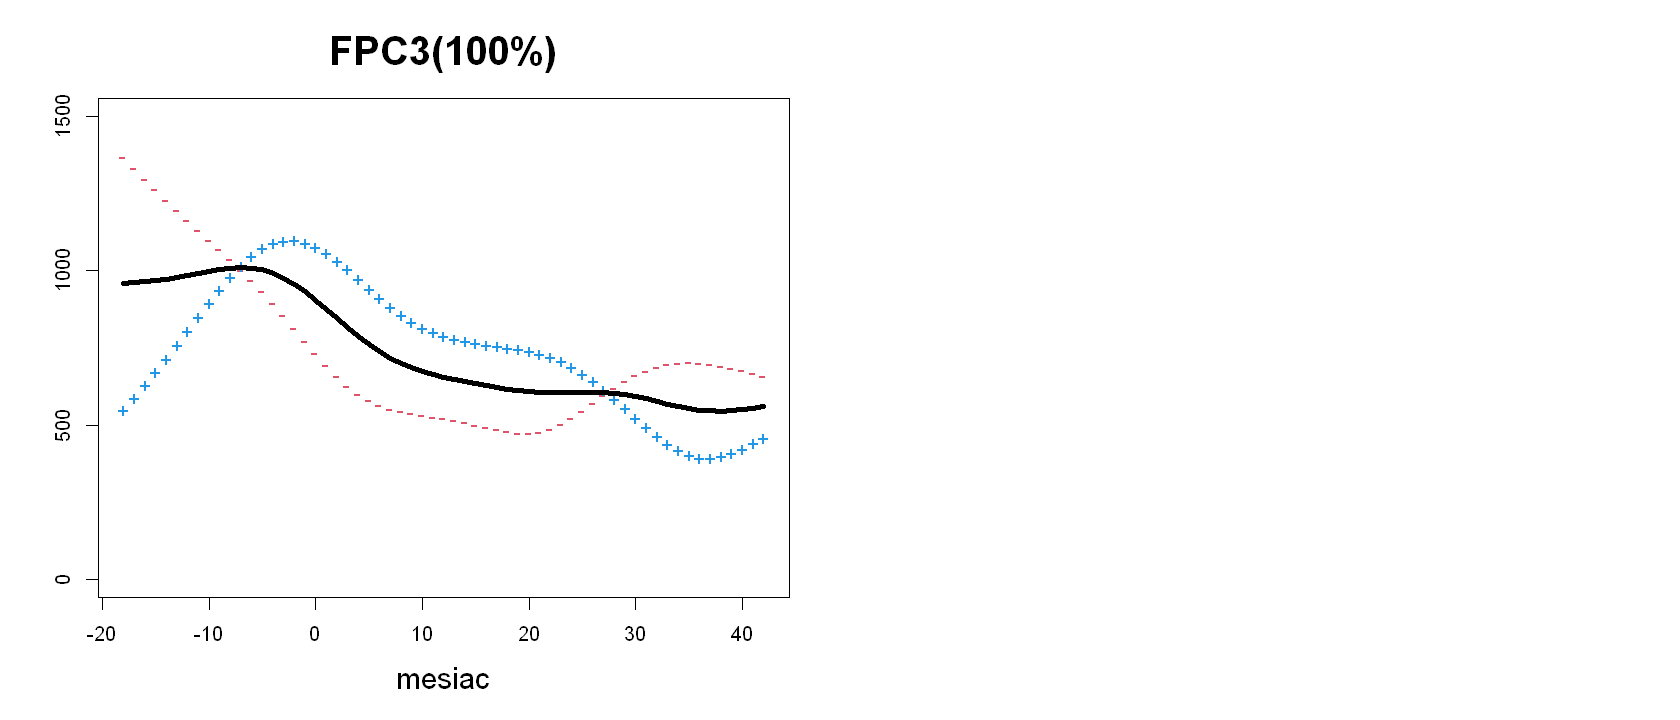

In [40]:
options(repr.plot.width=14, repr.plot.height=6)
par(mfrow=c(1,2))

for ( i in 1:fpca.res$npc) {
k.pc <- i
mean.hat <- fpca.res$mu
effect <- 2*sqrt(evals[k.pc])*efns[,k.pc]

matplot(month, cbind(mean.hat-effect, mean.hat+effect),
        pch = c("-", "+"), col = c(2,4),
        ylab="", xlab="mesiac", main=paste0("FPC", k.pc,"(", round(pve[k.pc]*100) ,"%)"),cex.main=2, cex.lab=1.5, 
        lwd=4, ylim=c(0,1500))
lines(month, mean.hat, type='l', lwd=4) } 

* Prvý komponent popisuje dáta vo všeobecnej rovine. Zároveň popisuje až 81% rozptylu.


* Druhý komponent delí dáta na dve časti, kde do zhruba 8 mesiaca sú dáta pod priemerom a ďalej sú nadpriemerné a naopak. Zároveň s druhým komponentom máme vysvetlených 92% rozptylu.


* Tretí komponent dáva do kontrastu dáta, ktoré majú podpriemernú prvú a poslednú štvrtinu pozorovaní a zvyšné sú nadpriemerné a naopak. Zároveň prvý, druhý a tretí komponent nám vysvetlí už takmer 100% rozptylu.

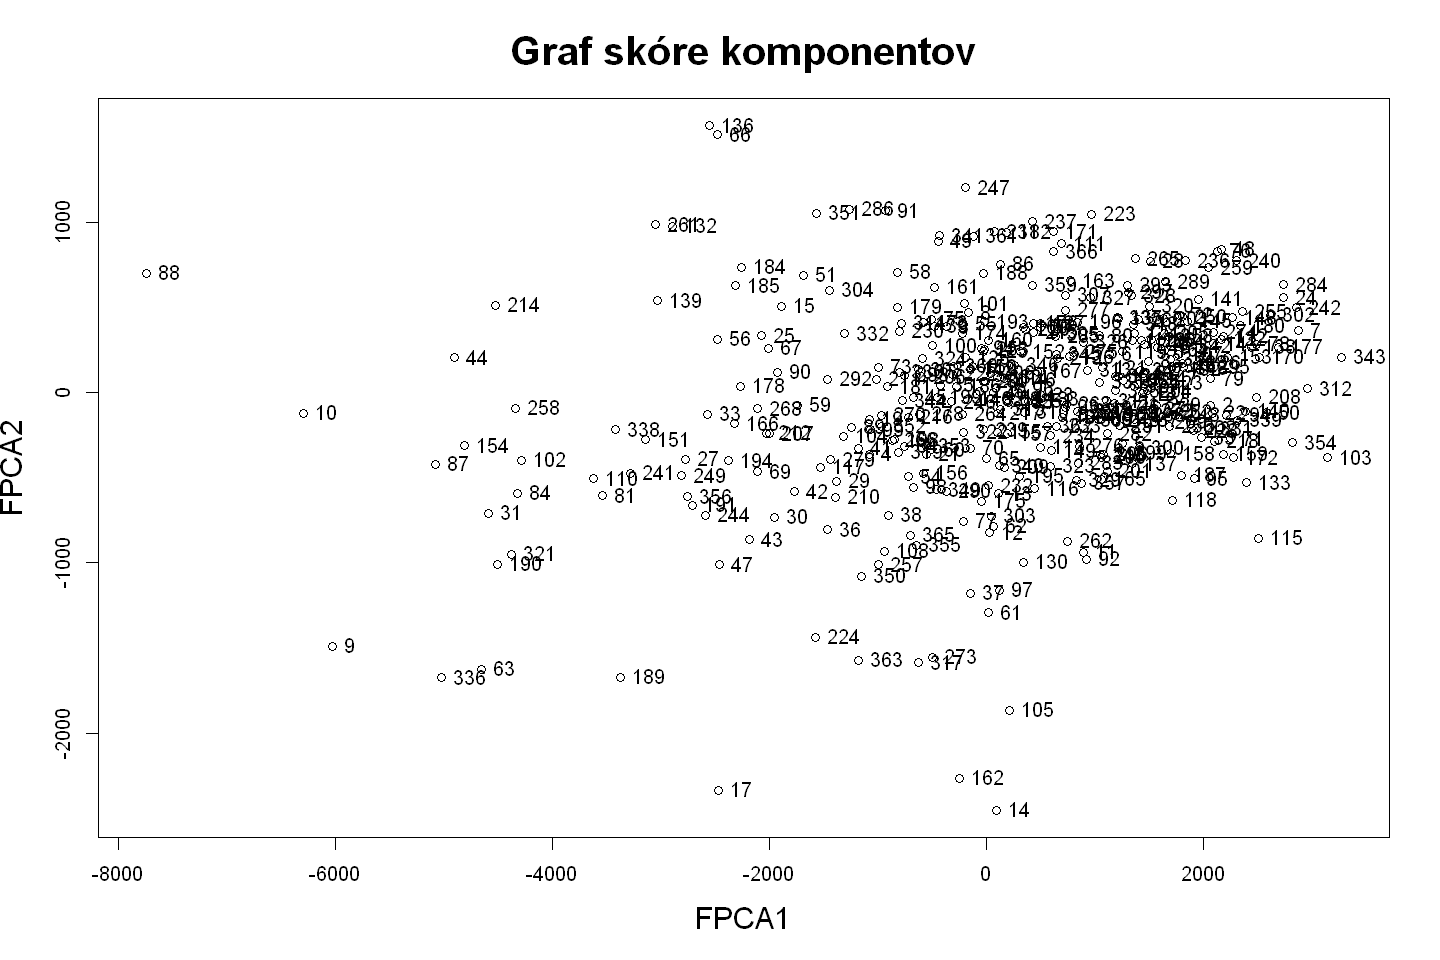

In [41]:
vektor<-1:366
rownames(fpca.res$scores)<-c(vektor)
options(repr.plot.width=12, repr.plot.height=8)
plot(fpca.res$scores[,-3], xlab="FPCA1", ylab="FPCA2", cex.lab=1.5, main="Graf skóre komponentov", cex.main=2, type="p")
text(fpca.res$scores[,1],fpca.res$scores[,2],rownames(fpca.res$scores),pos=4, cex=1)

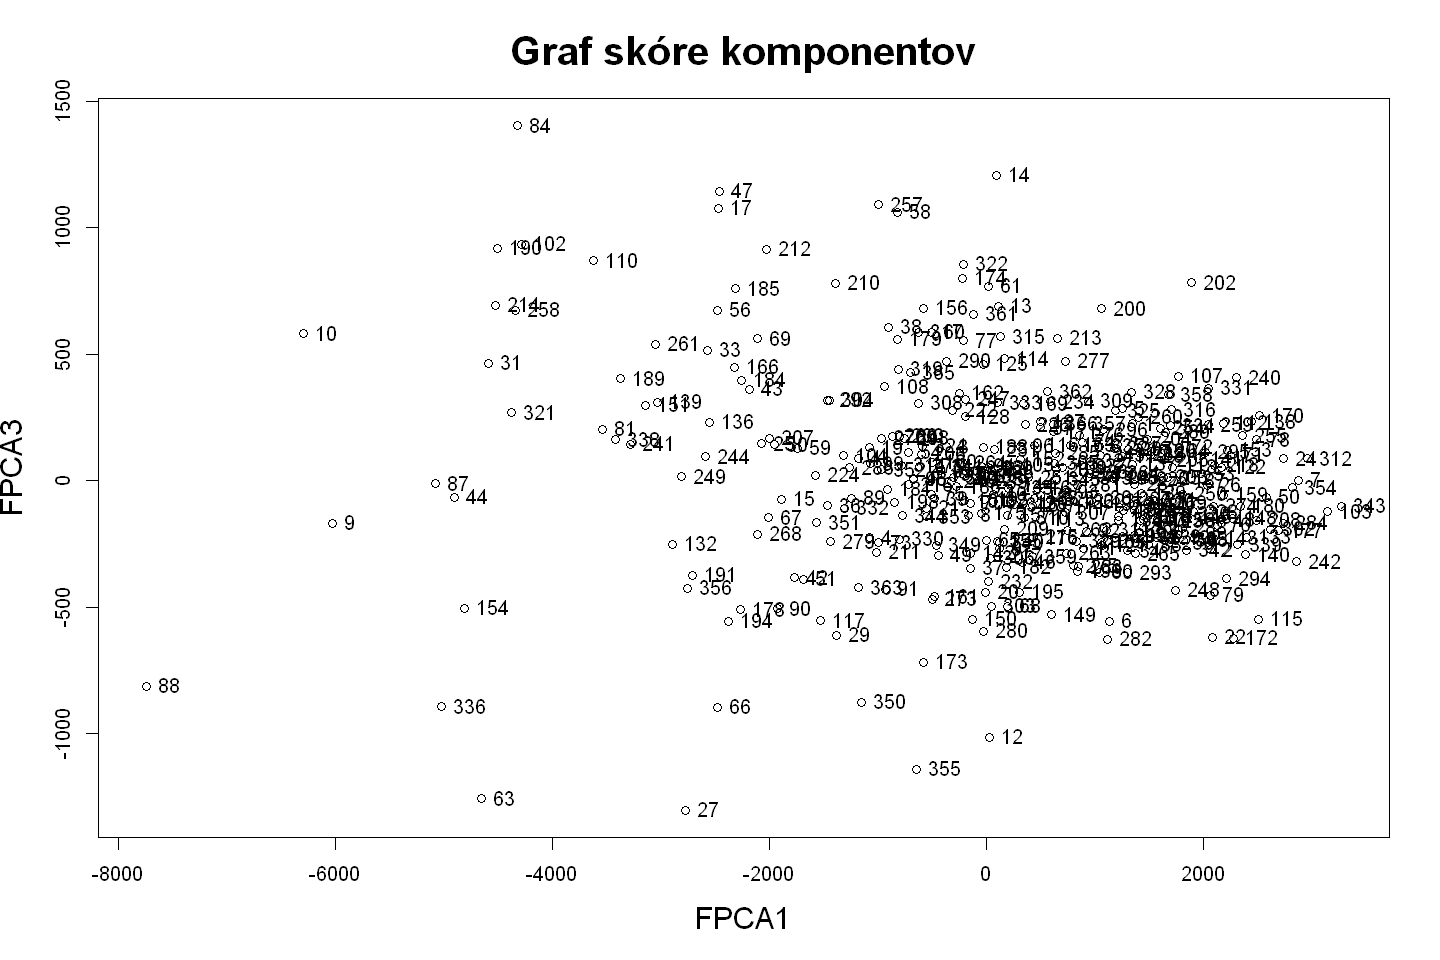

In [42]:
plot(fpca.res$scores[,-2], xlab="FPCA1", ylab="FPCA3", cex.lab=1.5, main="Graf skóre komponentov", cex.main=2)
text(fpca.res$scores[,1],fpca.res$scores[,3],rownames(fpca.res$scores),pos=4,cex=1)

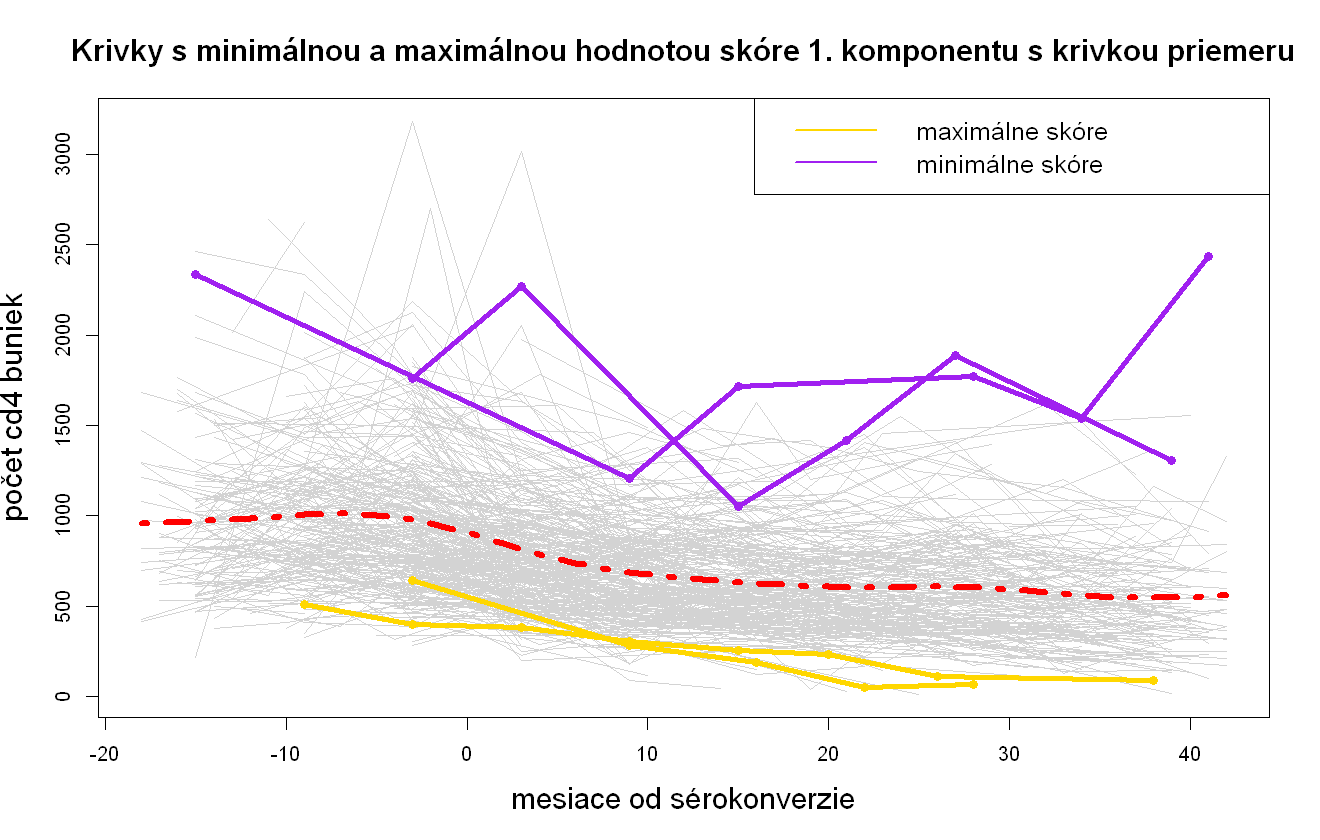

In [43]:
options(repr.plot.width=11, repr.plot.height=7)

matplot(month, t(cd4), type='l', 
        main="Krivky s minimálnou a maximálnou hodnotou skóre 1. komponentu s krivkou priemeru", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie", cex.main=1.5, cex.lab=1.5)
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  lines(temp$x, temp$y, col="light grey")}
lines(month, mean.hat, type='l', lwd=5, lty=4, col='red')

sel.crv<-c(103,343,10,88)
farby<-c("gold","gold","purple","purple")
for(i in 1:length(sel.crv)){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=farby[i], pch = 16, cex=1)
  lines(temp$x, temp$y, col=farby[i], lwd=4)
}
legend("topright", lwd=2, lty=1, col=farby[2:3], 
      legend = c("maximálne skóre", "minimálne skóre"), cex=1.25)

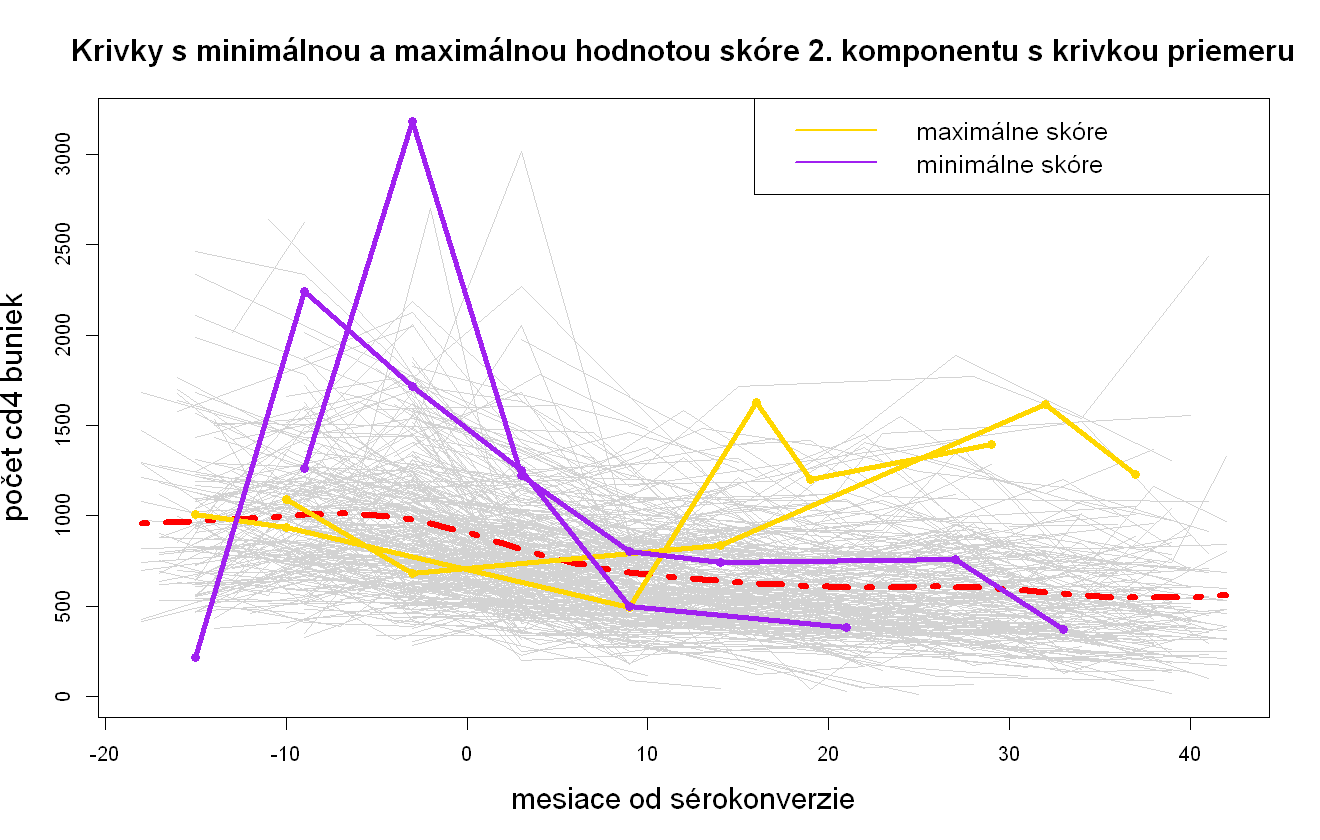

In [44]:
matplot(month, t(cd4), type='l', 
        main="Krivky s minimálnou a maximálnou hodnotou skóre 2. komponentu s krivkou priemeru", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie", cex.main=1.5, cex.lab=1.5)
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  lines(temp$x, temp$y, col="light grey")}
lines(month, mean.hat, type='l', lwd=5, lty=4, col='red')

sel.crv<-c(66,136,14,17)
farby<-c("gold","gold","purple","purple")
for(i in 1:length(sel.crv)){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=farby[i], pch = 16, cex=1)
  lines(temp$x, temp$y, col=farby[i], lwd=4)
}
legend("topright", lwd=2, lty=1, col=farby[2:3], 
      legend = c("maximálne skóre", "minimálne skóre"), cex=1.25)

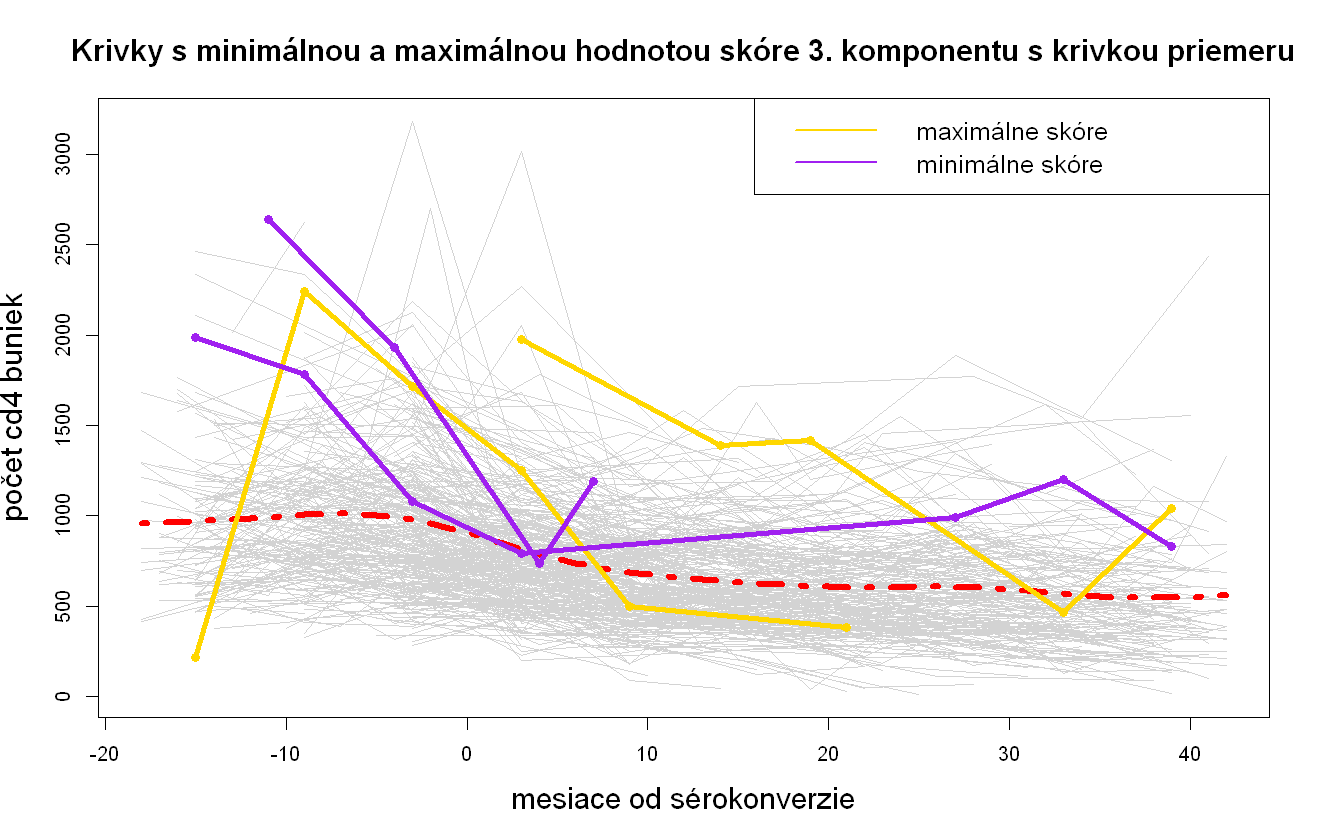

In [45]:
matplot(month, t(cd4), type='l', 
        main="Krivky s minimálnou a maximálnou hodnotou skóre 3. komponentu s krivkou priemeru", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie", cex.main=1.5, cex.lab=1.5)
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  lines(temp$x, temp$y, col="light grey")}
lines(month, mean.hat, type='l', lwd=5, lty=4, col='red')

sel.crv<-c(84,14,27,63)
farby<-c("gold","gold","purple","purple")
for(i in 1:length(sel.crv)){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=farby[i], pch = 16, cex=1)
  lines(temp$x, temp$y, col=farby[i], lwd=4)
}
legend("topright", lwd=2, lty=1, col=farby[2:3], 
      legend = c("maximálne skóre", "minimálne skóre"), cex=1.25)

Ak by sme si vykreslili krivky s najvyšším a najnižším skóre pre každý komponent a porovnali s krivkou priemeru, dostali by sme rovnakú interpretáciu, ako pri grafoch s účinkom vlastných funkcií na krivku priemeru. 

Pomocou odhadnutých vlastných funkcií a skóre môžeme tiež doplniť pôvodné krivky tak, aby mali rovnaký počet pozorovaní.

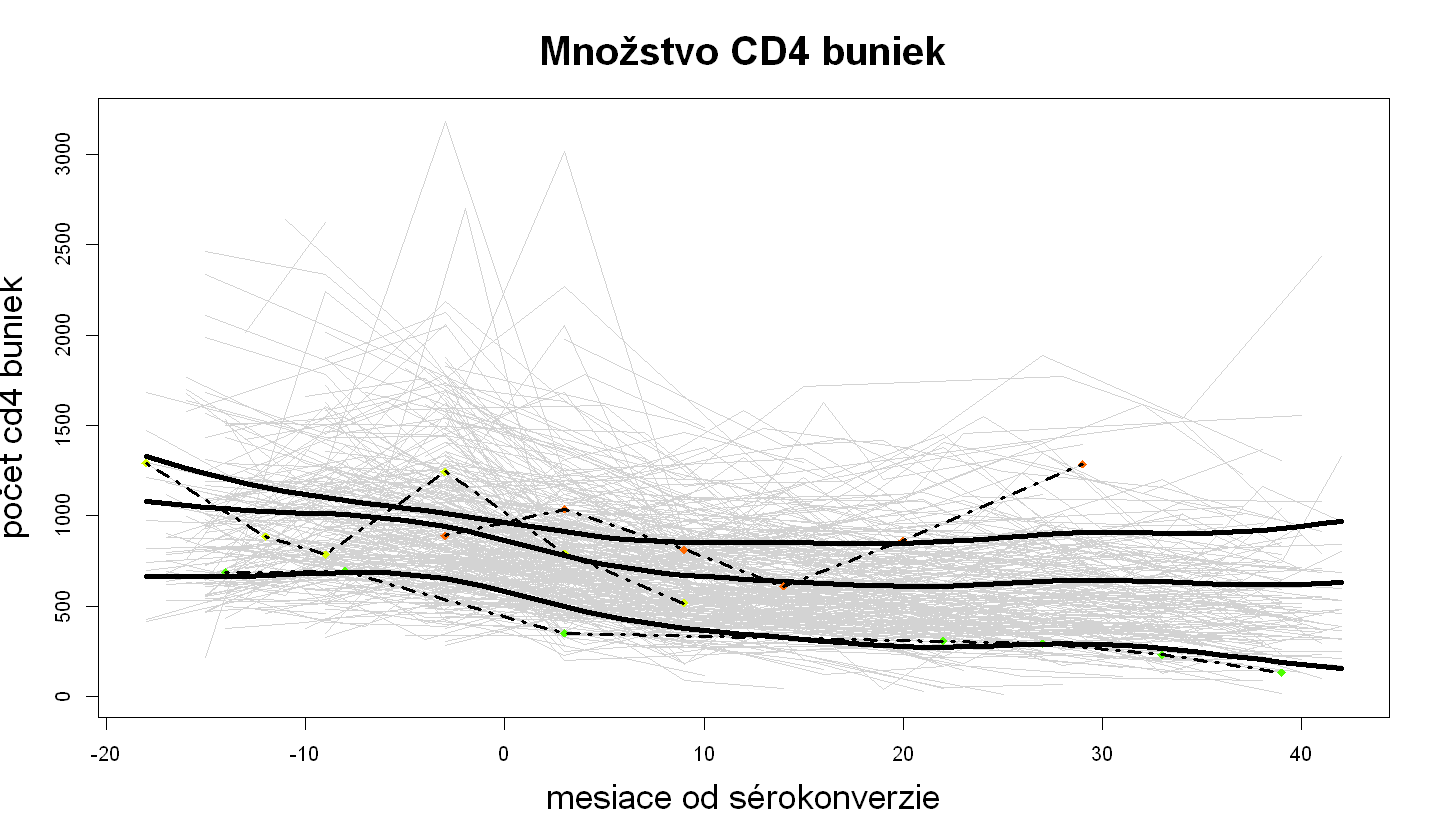

In [46]:
Yhat <- t(matrix(rep(fpca.res$mu, n), length(month))) + fpca.res$scores %*% t(fpca.res$efunctions)

options(repr.plot.width=12, repr.plot.height=7)

set.seed(12345)
n.crv <- 3
sel.crv <- sample(1:n, size = n.crv, replace = FALSE)

matplot(month, t(cd4), type='n', 
        main="Množstvo CD4 buniek", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie", cex.main=2, cex.lab=1.75 )
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  lines(temp$x, temp$y, col="light grey")
}
for(i in 1:n.crv){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=rainbow(2*n)[sel.crv[i]], 
         pch = 18, cex=1)
  lines(temp$x, temp$y, col="black", lwd=3, lty=4)
  lines(month, Yhat[sel.crv[i],], 
        col="black", lwd=4)
}

---

<a id=zaver></a>
**<font size=5 color=darkblue> 5. Zhrnutie R funkcií </font>** <br>

V prostredí jazyka R existuje viacero možností prevedenia metódy FPCA, ktoré sme využili:

1. tzv. **ručné rátanie**, kde potrebujeme kovariančnú maticu a jej spektrálny rozklad - pre tzv. úplné dáta,


2.  **využitie naimplementovanej metódy** a to: 


* `fpca.face()` - pre tzv. úplné dáta;


* `fpca.sc()` - pre tzv. neúplné dáta.

***
<a id=References></a>
# <font color=darkblue> 6. Zdroje </font>

* Goldsmith, J. et al., (2023). refund: Regression with Functional Data. 2023
<https://cran.r-project.org/web/packages/refund/index.html>


* Nychka, D., Furrer, R., Paige, J., & Sain, S. (2021). “fields: Tools for spatial data.” R package version 14.1, https://github.com/dnychka/fieldsRPackage.


* Ramsay, J. O., & Silverman, B. W. (2005). Functional data analysis (2nd ed). Springer.


* Ramsay, J., Hooker, G., & Graves, S. (2022). fda: Functional Data Analysis. 2022
<https://CRAN.R-project.org/package=fda>


* Staicu, A.-M., & Park, S. Y. (2016). Short Course on Applied Functional Data Analysis. [Online kurz.](https://www4.stat.ncsu.edu/~staicu/FDAtutorial/index.html)


* Wickham, H., Hester, J.,  & Bryan, J. (2022). readr: Read Rectangular Text Data. R
  package version 2.1.2. https://CRAN.R-project.org/package=readr


* Wood SN (2004). “Stable and efficient multiple smoothing parameter estimation for generalized additive models.” Journal of the American Statistical Association, 99(467), 673-686.
